In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
df = pd.read_csv("../data/coches_consolidado_limpio.csv")

In [3]:
df['nombre_vendedor'] = df['nombre_vendedor'].str.replace('\r', '', regex=False)
df

modelo_titulo  provincia  \
0                                      308 1.4 95cv 5p.     Lleida   
1     León ST 1.6 TDI CR 85 kW (115 CV) Start&Stop S...     Lleida   
2                          308 1.5BlueHDi S&S Style 130     Lleida   
3              Grandland X Grand Land 1.6CDTI Selective     Lleida   
4                  A3 Sportback Sportback 35 TFSI 150cv     Lleida   
...                                                 ...        ...   
5630                                   500 1.5 T Luxury     Madrid   
5631                         HR-V SUV 1.5 i-MMD Advance   Valencia   
5632                Sandero Stepway TCe Extreme Go 81kW     Madrid   
5633         CX-5 e-Sky G MHEV 2.0 121kW Exclusive-Line       León   
5634              Clio TCe GLP Evolution 74kW Evolution  Barcelona   

      kilometraje combustible distintivo_ambiental  garantia  \
0          142137    Gasolina                    C      12.0   
1          106736      Diésel                  NaN      12.0   
2           68314      Diésel                    C      12.0   
3           55531      Diésel                  NaN      12.0   
4           75800    Gasolina                    C      12.0   
...           ...         ...                  ...       ...   
5630         1101    Gasolina                    C      36.0   
5631          509     Híbrido                  ECO      24.0   
5632         1800    Gasolina                    C      24.0   
5633         4500     Híbrido                  ECO      72.0   
5634         1318    Gasolina                    C      24.0   

      cambio_automatico         carroceria  plazas  potencia  ...  \
0                 False            Berlina     NaN      95.0  ...   
1                 False           Familiar     NaN     116.0  ...   
2                 False            Berlina     5.0     130.0  ...   
3                 False  4x4, SUV o pickup     NaN     120.0  ...   
4                 False            Berlina     NaN     150.0  ...   
...                 ...                ...     ...       ...  ...   
5630               True  4x4, SUV o pickup     NaN     114.0  ...   
5631               True       Todo Terreno     5.0     131.0  ...   
5632              False            Berlina     5.0     110.0  ...   
5633              False  4x4, SUV o pickup     NaN     164.0  ...   
5634              False            Berlina     NaN     100.0  ...   

                fecha_extraccion referencia  \
0     2025-02-19 17:01:36.887580   14946771   
1     2025-02-19 17:01:44.312012   14962083   
2     2025-02-19 17:01:54.282640   15014897   
3     2025-02-19 17:02:02.672957   15027844   
4     2025-02-19 17:02:11.380113   15068938   
...                          ...        ...   
5630  2025-02-27 06:29:35.560200   15469997   
5631  2025-02-27 06:29:45.457940   15485417   
5632  2025-02-27 06:32:09.461304   15480085   
5633  2025-02-27 06:32:16.106535   15483777   
5634  2025-02-27 06:32:23.157322   15486321   

                                                    url  \
0     https://www.autocasion.com/coches-segunda-mano...   
1     https://www.autocasion.com/coches-segunda-mano...   
2     https://www.autocasion.com/coches-segunda-mano...   
3     https://www.autocasion.com/coches-segunda-mano...   
4     https://www.autocasion.com/coches-segunda-mano...   
...                                                 ...   
5630  https://www.autocasion.com/coches-km0/km-0/dfs...   
5631  https://www.autocasion.com/coches-km0/km-0/hon...   
5632  https://www.autocasion.com/coches-km0/km-0/dac...   
5633  https://www.autocasion.com/coches-km0/km-0/maz...   
5634  https://www.autocasion.com/coches-km0/km-0/ren...   

                                            ruta_imagen  marca_sola  \
0     ../img/coches/14946771-0-5926368496749e1fa4cfb...     PEUGEOT   
1     ../img/coches/14962083-0-824922025674e0c07cb9c...        SEAT   
2     ../img/coches/15014897-0-1402892972675898157d3...     PEUGEOT   
3     ../img/coches/15027844-0-557393874675b0

Transformaciones a las categorias

In [4]:
df["carroceria"].unique()

array(['Berlina', 'Familiar', '4x4, SUV o pickup', 'Todo Terreno',
       'Descapotable o convertible', 'Deportivo o coupé', 'Monovolumen',
       'Pequeño', nan], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo_titulo         5635 non-null   object 
 1   provincia             5635 non-null   object 
 2   kilometraje           5635 non-null   int64  
 3   combustible           5595 non-null   object 
 4   distintivo_ambiental  5148 non-null   object 
 5   garantia              5635 non-null   float64
 6   cambio_automatico     5635 non-null   bool   
 7   carroceria            5630 non-null   object 
 8   plazas                3833 non-null   float64
 9   potencia              5603 non-null   float64
 10  puertas               5635 non-null   int64  
 11  color                 5635 non-null   object 
 12  precio                5634 non-null   float64
 13  vendedor_profesional  5635 non-null   bool   
 14  consumo_medio         2204 non-null   float64
 15  certificado          

## Relación de variables entre si

In [6]:
columnas_categoricas = ['distintivo_ambiental', 'garantia', 'carroceria', 'plazas', 'puertas', 'consumo_medio', 'vendedor_profesional']

In [7]:
def formatear_texto(columna):
    return columna.replace('_', ' ').title()

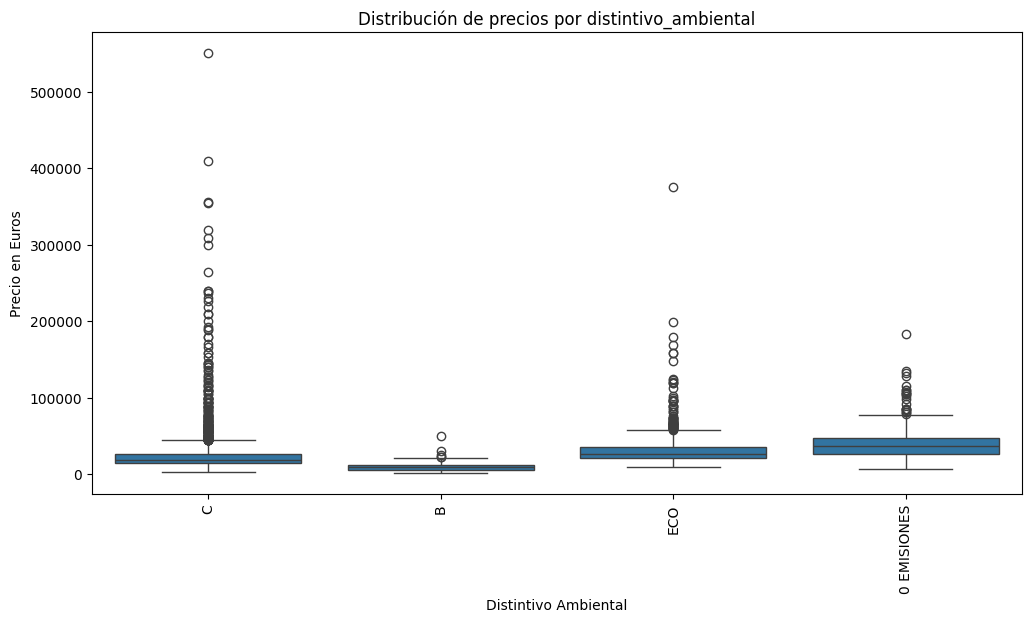

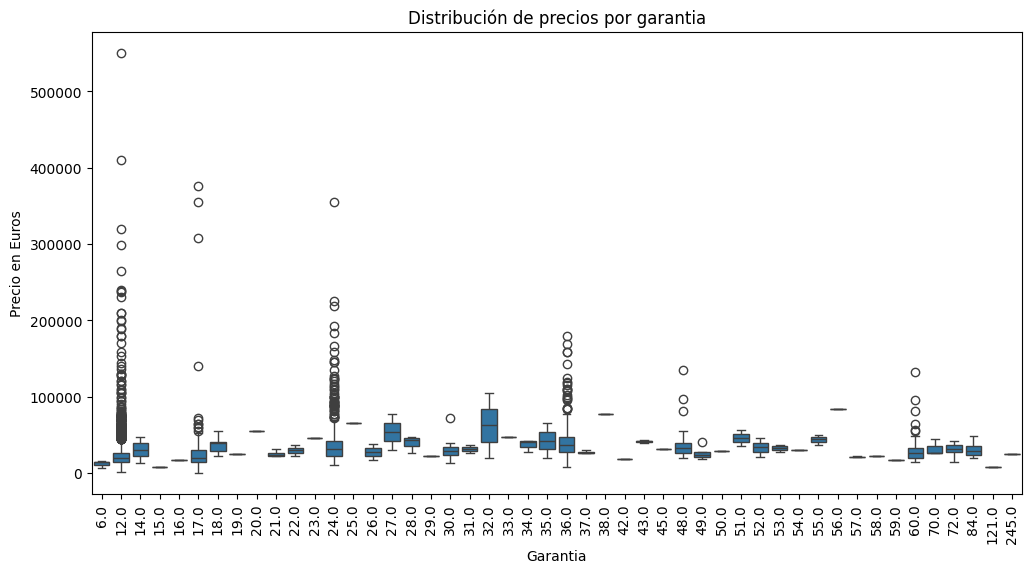

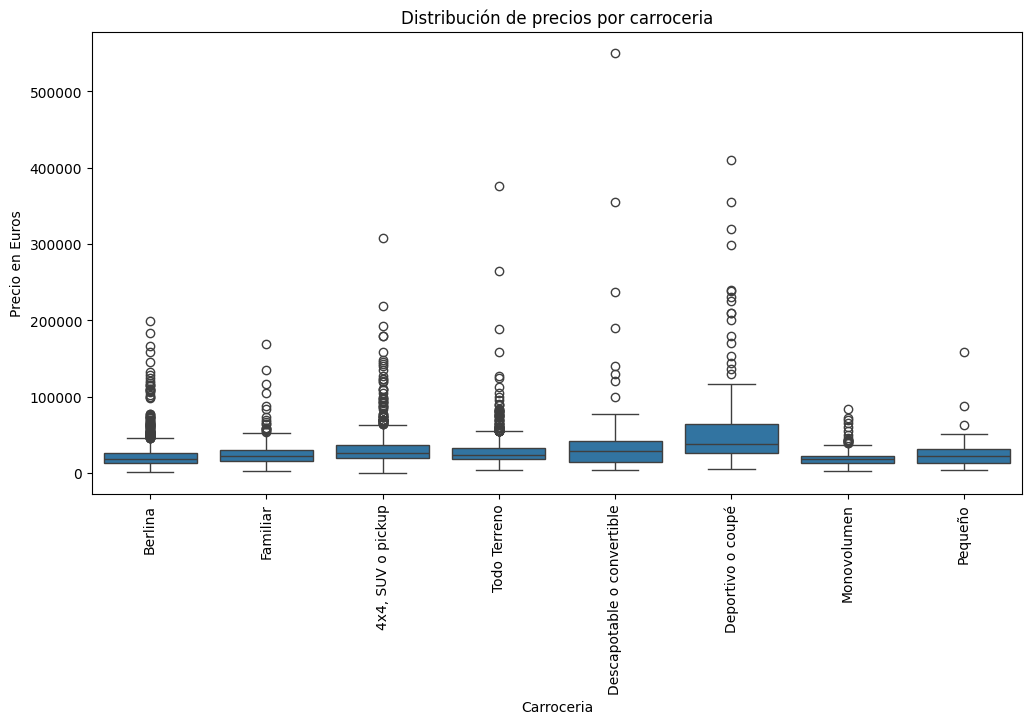

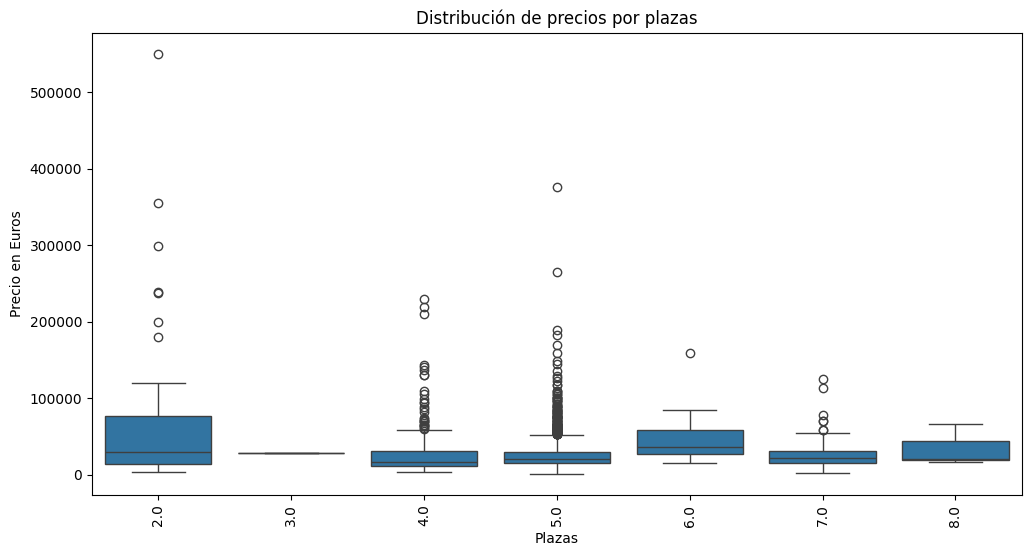

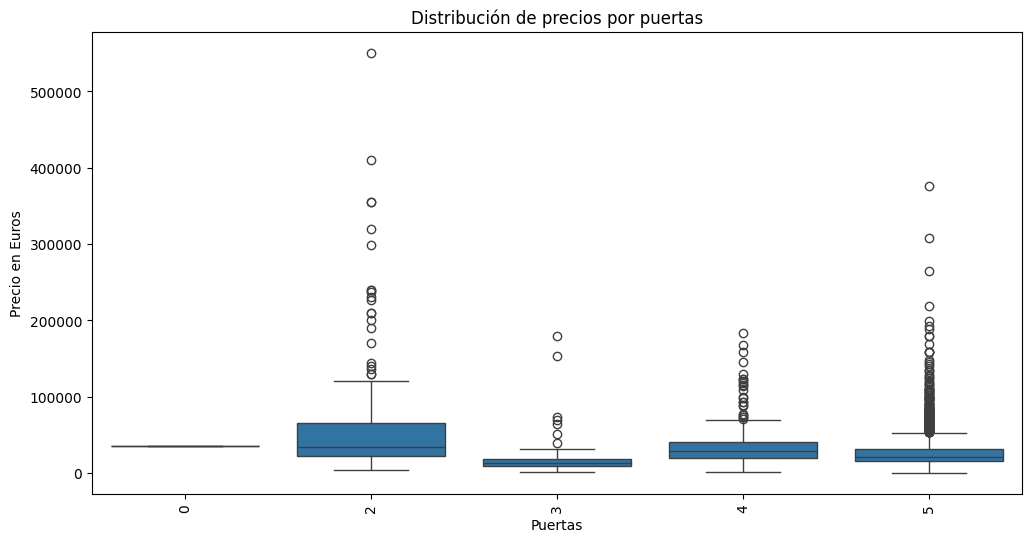

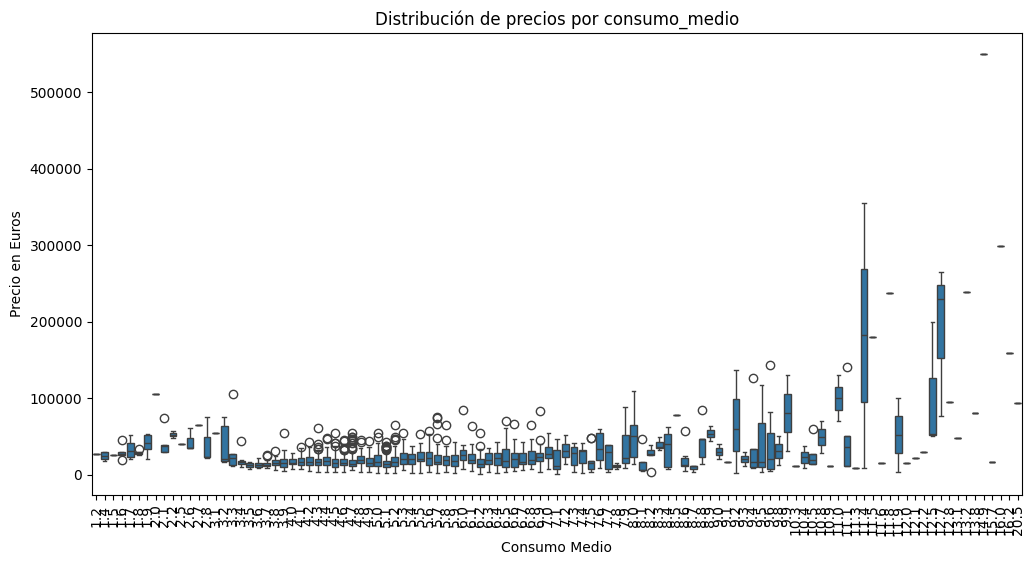

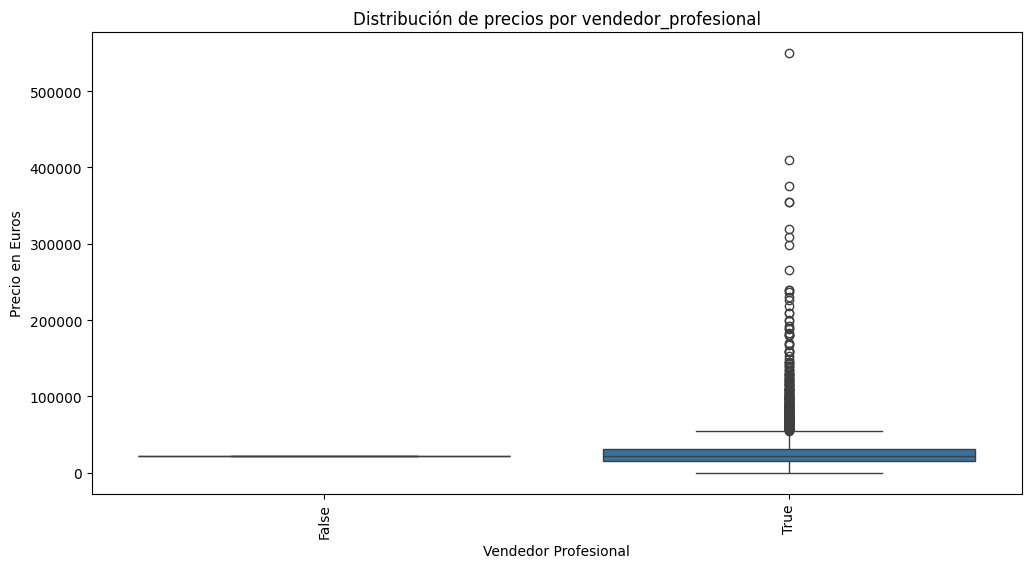

In [8]:
for columna in columnas_categoricas:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x= columna, y='precio', data=df)
    plt.xlabel(f"{formatear_texto(columna)}") 
    plt.ylabel("Precio en Euros")
    plt.xticks(rotation=90)
    plt.title(f'Distribución de precios por {columna}')
    plt.show()

In [9]:
columnas_numericas = []

for columna in df.columns:
    if (df[columna].dtype in [np.float64, np.int64]) and (columna != 'referencia'):
        columnas_numericas.append(columna)

columnas_numericas


['kilometraje',
 'garantia',
 'plazas',
 'potencia',
 'puertas',
 'precio',
 'consumo_medio',
 'mes_matricula',
 'anio_matricula']

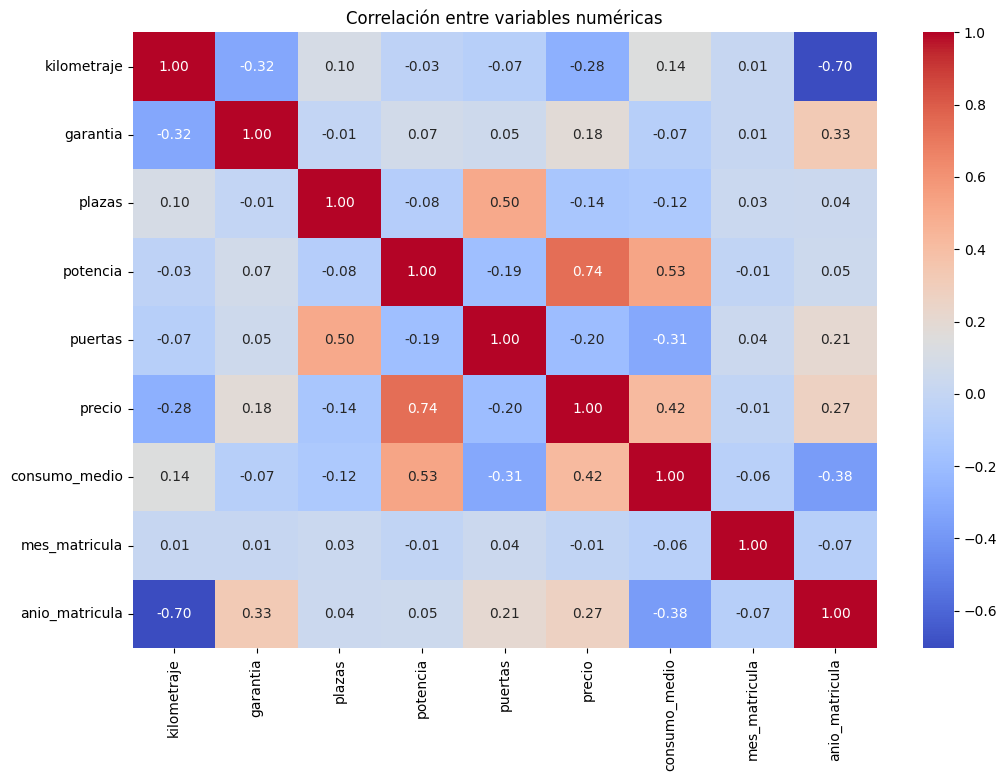

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

correlacion = df[columnas_numericas].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre variables numéricas')
plt.show()

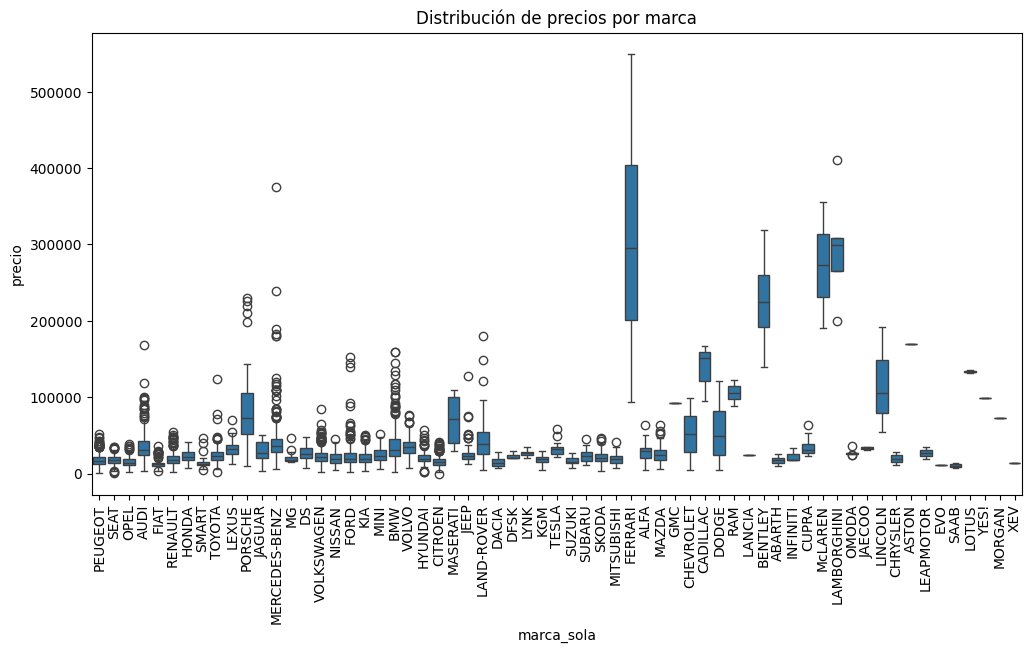

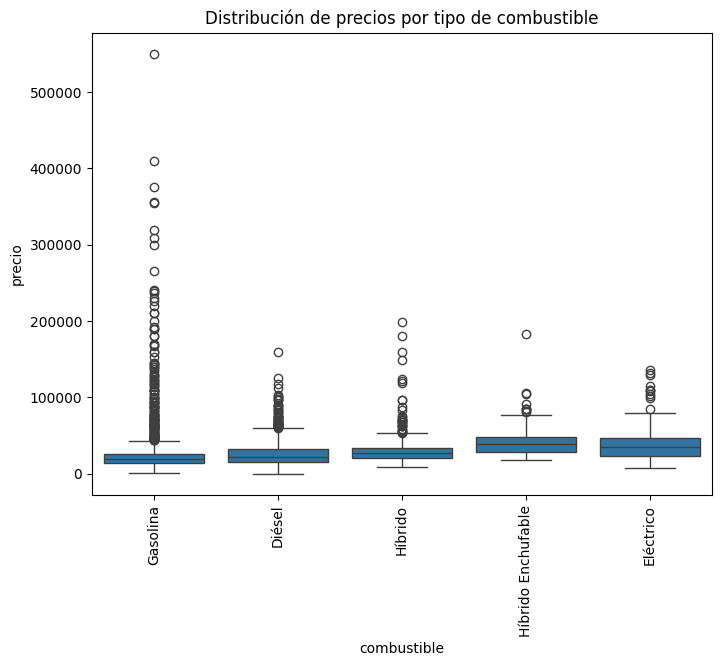

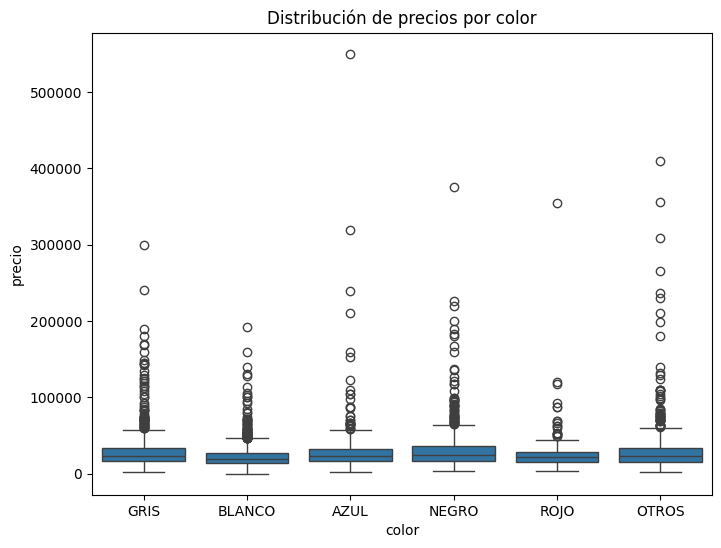

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='marca_sola', y='precio', data=df)
plt.xticks(rotation=90)
plt.title('Distribución de precios por marca')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='combustible', y='precio', data=df)
plt.title('Distribución de precios por tipo de combustible')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='color', y='precio', data=df)
plt.title('Distribución de precios por color')
plt.show()

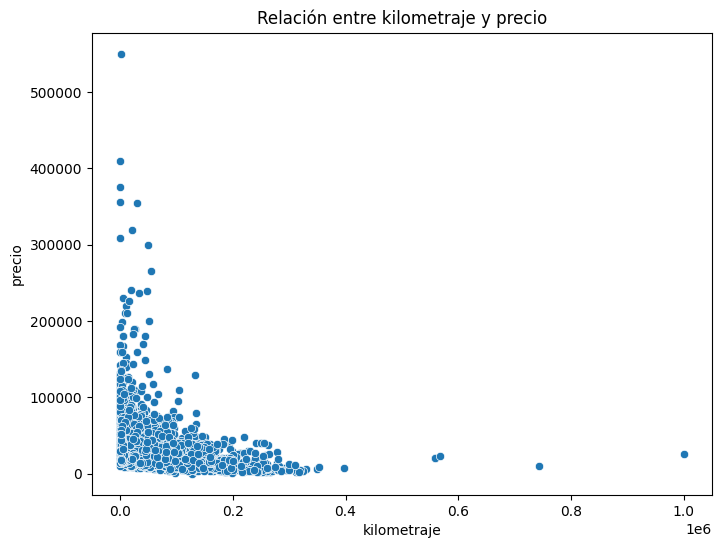

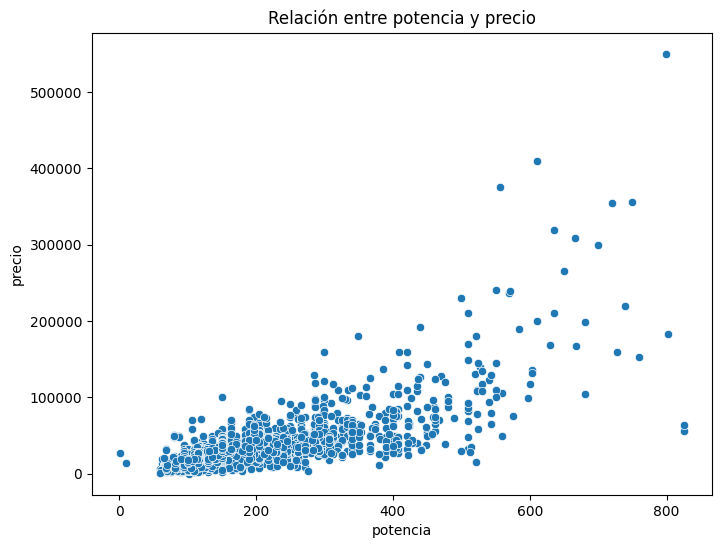

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='kilometraje', y='precio', data=df)
plt.title('Relación entre kilometraje y precio')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='potencia', y='precio', data=df)
plt.title('Relación entre potencia y precio')
plt.show()

## Relación precio y antigüedad de coches

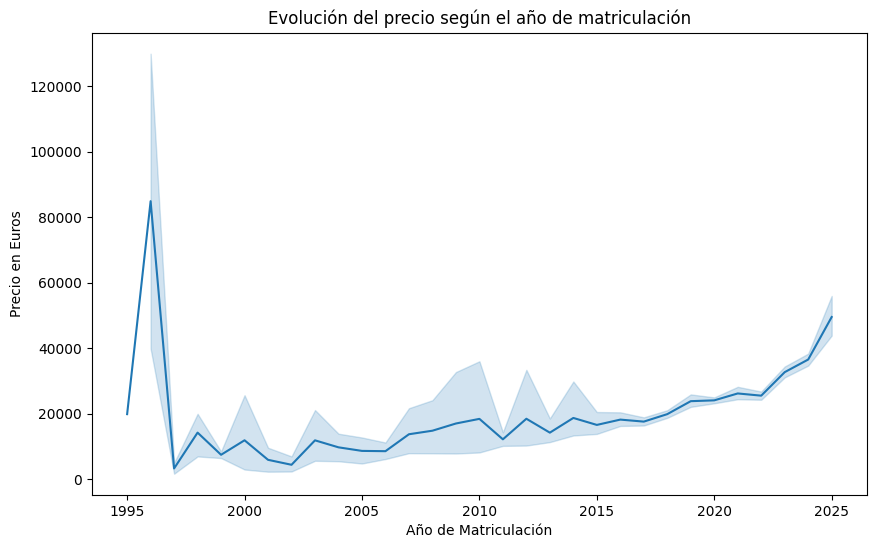

In [13]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='anio_matricula', y='precio', data=df)
plt.title('Evolución del precio según el año de matriculación')
plt.xlabel("Año de Matriculación") 
plt.ylabel("Precio en Euros")
plt.show()

In [14]:
concesionarios = pd.read_csv("../data/concesionarios_limpio.csv")

In [15]:
concesionarios.columns 

Index(['nombre', 'calle', 'municipio', 'provincia', 'codigo_postal'], dtype='object')

In [16]:
df.columns

Index(['modelo_titulo', 'provincia', 'kilometraje', 'combustible',
       'distintivo_ambiental', 'garantia', 'cambio_automatico', 'carroceria',
       'plazas', 'potencia', 'puertas', 'color', 'precio',
       'vendedor_profesional', 'consumo_medio', 'certificado',
       'fecha_extraccion', 'referencia', 'url', 'ruta_imagen', 'marca_sola',
       'mes_matricula', 'anio_matricula', 'nombre_vendedor',
       'peninsula_y_baleares', 'comunidad'],
      dtype='object')

In [17]:
concesionarios["municipio"] = concesionarios["municipio"].str.replace("Municipio: ", "", regex=True)

concesionarios['nombre'] = concesionarios['nombre'].apply(lambda x: x.upper())
concesionarios = concesionarios.rename(columns={'nombre': 'nombre_vendedor'})
concesionarios = concesionarios[["nombre_vendedor", "municipio", "codigo_postal"]]

concesionarios

nombre_vendedor             municipio  codigo_postal
0     --AUTOMOVILES VIA NORTE --                 Naron        15570.0
1                    *ACS MOTOR*               Iniesta        16235.0
2                   + QUE COCHES  Talavera de la reina        45600.0
3                       11ELEVEN                Madrid        28294.0
4                13 PREMIUM CARS                Aldaia        46960.0
...                          ...                   ...            ...
4095                     ZENCARS                Madrid        28049.0
4096  ZENTRO MACHINE- CASE, S.A.                   NaN            0.0
4097            ZOANSA TAILERRAK       Lesaka, navarra        31770.0
4098              ZOE AUTOMOCION               Sonseca        45100.0
4099              ZYLAUTOS MOTOR              Valencia        46017.0

[4100 rows x 3 columns]

In [18]:
df_unido = pd.merge(df, concesionarios, on='nombre_vendedor', how='left')

In [19]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo_titulo         5647 non-null   object 
 1   provincia             5647 non-null   object 
 2   kilometraje           5647 non-null   int64  
 3   combustible           5607 non-null   object 
 4   distintivo_ambiental  5160 non-null   object 
 5   garantia              5647 non-null   float64
 6   cambio_automatico     5647 non-null   bool   
 7   carroceria            5642 non-null   object 
 8   plazas                3842 non-null   float64
 9   potencia              5613 non-null   float64
 10  puertas               5647 non-null   int64  
 11  color                 5647 non-null   object 
 12  precio                5646 non-null   float64
 13  vendedor_profesional  5647 non-null   bool   
 14  consumo_medio         2211 non-null   float64
 15  certificado          

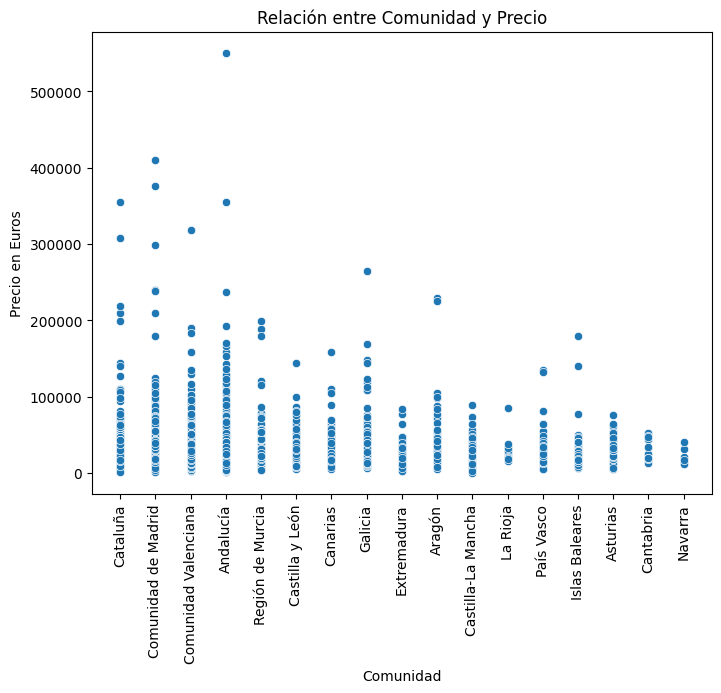

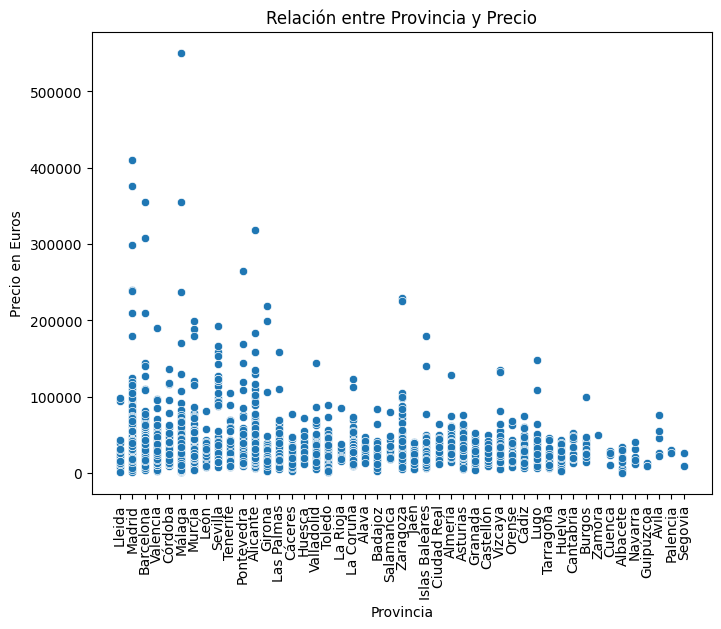

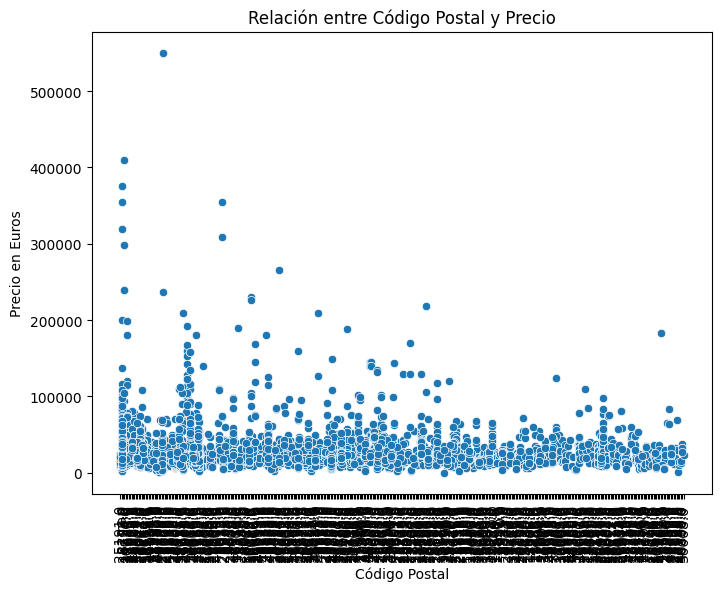

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='comunidad', y='precio', data=df)
plt.title('Relación entre Comunidad y Precio')
plt.xticks(rotation=90)
plt.xlabel("Comunidad") 
plt.ylabel("Precio en Euros")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='provincia', y='precio', data=df)
plt.title('Relación entre Provincia y Precio')
plt.xlabel("Provincia") 
plt.ylabel("Precio en Euros")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_unido['codigo_postal'].astype(str), y='precio', data=df_unido)
plt.title('Relación entre Código Postal y Precio')
plt.xlabel("Código Postal") 
plt.ylabel("Precio en Euros")
plt.xticks(rotation=90)
plt.show()

In [21]:
df.columns

Index(['modelo_titulo', 'provincia', 'kilometraje', 'combustible',
       'distintivo_ambiental', 'garantia', 'cambio_automatico', 'carroceria',
       'plazas', 'potencia', 'puertas', 'color', 'precio',
       'vendedor_profesional', 'consumo_medio', 'certificado',
       'fecha_extraccion', 'referencia', 'url', 'ruta_imagen', 'marca_sola',
       'mes_matricula', 'anio_matricula', 'nombre_vendedor',
       'peninsula_y_baleares', 'comunidad'],
      dtype='object')

## Definir dos gráficos 


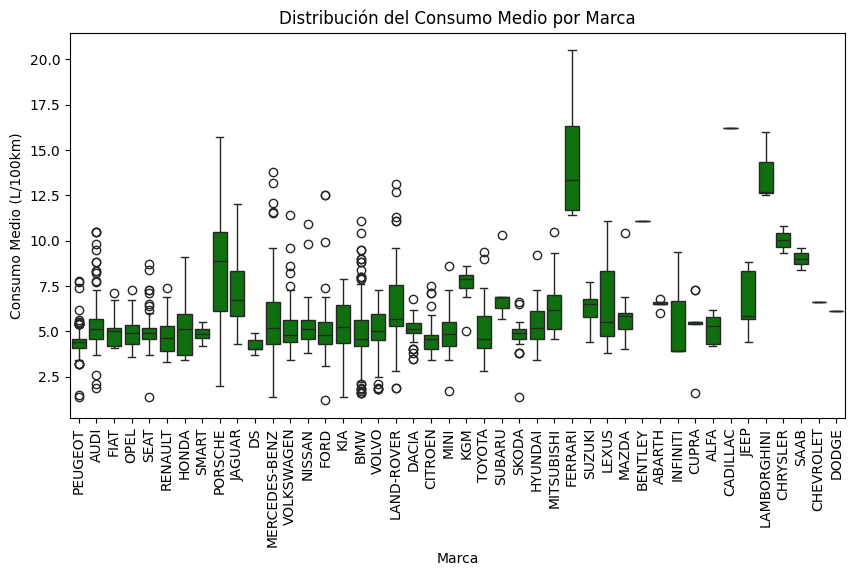

In [22]:
#Relación de consumo medio por marca
plt.figure(figsize=(10,5))

df_consumo = df[df['consumo_medio']>0] 

sns.boxplot(x='marca_sola', y='consumo_medio', data=df_consumo, color= 'green')

plt.xlabel('Marca')
plt.ylabel('Consumo Medio (L/100km)')
plt.title('Distribución del Consumo Medio por Marca')
plt.xticks(rotation=90)

plt.show()


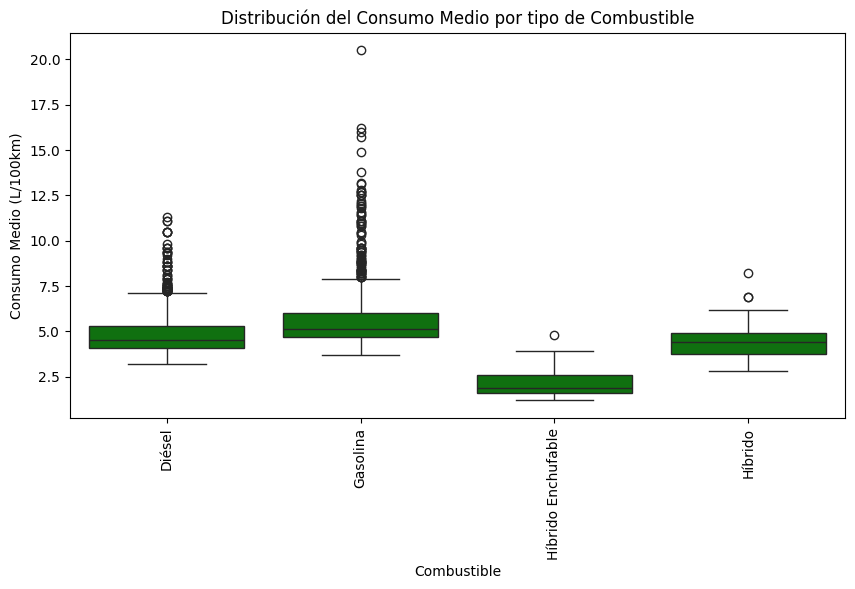

In [23]:
#Relación de consumo medio por tipo de combustible
plt.figure(figsize=(10,5))

sns.boxplot(x='combustible', y='consumo_medio', data=df_consumo, color= 'green')

plt.xlabel('Combustible')
plt.ylabel('Consumo Medio (L/100km)')
plt.title('Distribución del Consumo Medio por tipo de Combustible')
plt.xticks(rotation=90)

plt.show()

## Gráfico de outliers


La distribución de precios NO es normal (p <= 0.05), usaremos IQR (Tukey).


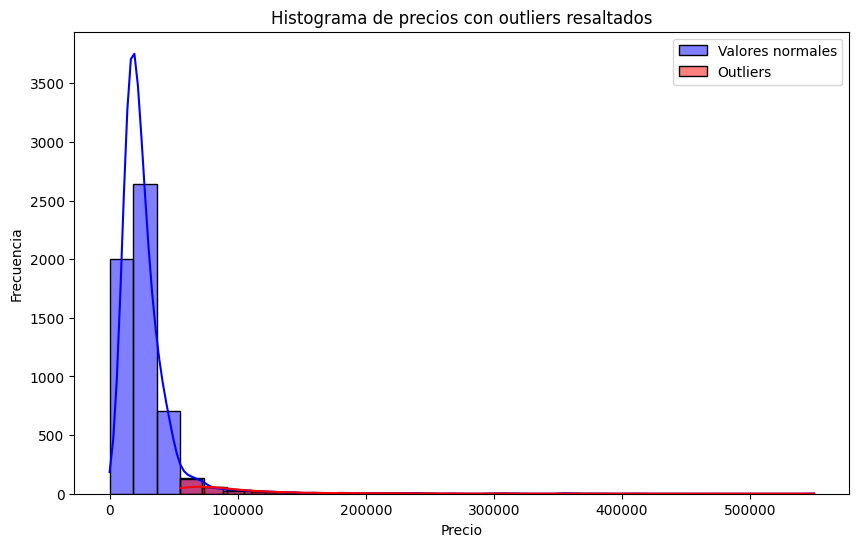

18       56400.0
82       57990.0
148      86990.0
179      68900.0
193     236999.0
          ...   
5497    112900.0
5525    192500.0
5547     62900.0
5549    134900.0
5559     57000.0
Name: precio, Length: 288, dtype: float64

In [24]:
from scipy.stats import normaltest, zscore

columna = "precio"

stat, p_value = normaltest(df[columna].dropna())  

# Si p > 0.05 tiene distribucion normal y usamos Z-Score, si no usamos Tukey
if p_value > 0.05:
    print("La distribución de precios es normal (p > 0.05), usaremos Z-Score.")
    z = 3  
    z_scores = zscore(df[columna].dropna())
    outliers = df[np.abs(z_scores) > z]
else:
    print("La distribución de precios NO es normal (p <= 0.05), usaremos IQR (Tukey).")
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    ric = q3 - q1
    lim_izq= q1 - 1.5 * ric
    lim_der = q3 + 1.5 * ric
    outliers = df[(df[columna] < lim_izq) | (df[columna] > lim_der)]

plt.figure(figsize=(10, 6))
sns.histplot(df[columna], bins=30, kde=True, color="blue", label="Valores normales")
sns.histplot(outliers[columna], bins=30, kde=True, color="red", label="Outliers")

plt.title("Histograma de precios con outliers resaltados")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

outliers[columna]

## MAPA COROPLETICO

In [25]:
df_agrupado1 = df.groupby("comunidad").agg(
    cantidad_coches=("precio", "count"),
    precio_medio=("precio", "mean")
).reset_index()


In [26]:
df_agrupado1

comunidad  cantidad_coches  precio_medio
0              Andalucía              716  30942.110335
1                 Aragón              131  34075.389313
2               Asturias              169  31151.934911
3               Canarias              190  29888.157895
4              Cantabria               17  32714.705882
5        Castilla y León              170  29401.141176
6     Castilla-La Mancha              105  28981.990476
7               Cataluña              849  24068.489988
8   Comunidad Valenciana              579  30892.587219
9    Comunidad de Madrid             2034  23849.273353
10           Extremadura              103  22557.941748
11               Galicia              228  33161.271930
12        Islas Baleares              113  23890.566372
13              La Rioja               19  27313.157895
14               Navarra                6  23032.833333
15            País Vasco              143  26597.706294
16      Región de Murcia               62  42224.032258

In [27]:
coordenadas_dict = {
    'Andalucía': [-6.933198279, 38.20515158308281],
    'Cataluña': [1.0, 41.6],
    'Madrid': [-3.7038, 40.4168],
    'Galicia': [-8.5, 42.0],
    'Castilla y León': [-4.7, 41.6],
    'Castilla-La Mancha': [-3.5, 39.9],
    'Comunidad Valenciana': [-0.6, 39.5],
    'País Vasco': [-2.0, 43.0],
    'Aragón': [-1.0, 41.5],
    'Extremadura': [-6.0, 39.5],
    'Canarias': [-13.5, 28.3],
    'Cantabria': [-4.0, 43.3],
    'Región de Murcia': [-1.0, 38.0],
    'Baleares': [2.5, 39.5],
    'Asturias': [-6.933198279, 38.20515158308281],
    'La Rioja': [-2.0, 42.0],
    'Navarra': [-1.6, 42.7],
    'Castilla y León': [-4.7, 41.6],
    'Comunidad de Madrid': [-3.7038, 40.4168],
    'Ceuta': [-5.3, 35.9],
    'Melilla': [-2.9, 35.3]
}

df_agrupado1['coordenadas_comunidad'] = df_agrupado1['comunidad'].map(coordenadas_dict)


df_agrupado1

comunidad  cantidad_coches  precio_medio  \
0              Andalucía              716  30942.110335   
1                 Aragón              131  34075.389313   
2               Asturias              169  31151.934911   
3               Canarias              190  29888.157895   
4              Cantabria               17  32714.705882   
5        Castilla y León              170  29401.141176   
6     Castilla-La Mancha              105  28981.990476   
7               Cataluña              849  24068.489988   
8   Comunidad Valenciana              579  30892.587219   
9    Comunidad de Madrid             2034  23849.273353   
10           Extremadura              103  22557.941748   
11               Galicia              228  33161.271930   
12        Islas Baleares              113  23890.566372   
13              La Rioja               19  27313.157895   
14               Navarra                6  23032.833333   
15            País Vasco              143  26597.706294   
16      Región de Murcia               62  42224.032258   

                coordenadas_comunidad  
0   [-6.933198279, 38.20515158308281]  
1                        [-1.0, 41.5]  
2   [-6.933198279, 38.20515158308281]  
3                       [-13.5, 28.3]  
4                        [-4.0, 43.3]  
5                        [-4.7, 41.6]  
6                        [-3.5, 39.9]  
7                         [1.0, 41.6]  
8                        [-0.6, 39.5]  
9                  [-3.7038, 40.4168]  
10                       [-6.0, 39.5]  
11                       [-8.5, 42.0]  
12                                NaN  
13                       [-2.0, 42.0]  
14                       [-1.6, 42.7]  
15                       [-2.0, 43.0]  
16                       [-1.0, 38.0]

In [28]:
df_agrupado1['comunidad'] = df_agrupado1['comunidad'].replace({
    "Comunidad Valenciana": "Comunitat Valenciana",
    "Navarra": "Comunidad Foral de Navarra",
    "Asturias":"Principado de Asturias",
})
df_agrupado1

comunidad  cantidad_coches  precio_medio  \
0                    Andalucía              716  30942.110335   
1                       Aragón              131  34075.389313   
2       Principado de Asturias              169  31151.934911   
3                     Canarias              190  29888.157895   
4                    Cantabria               17  32714.705882   
5              Castilla y León              170  29401.141176   
6           Castilla-La Mancha              105  28981.990476   
7                     Cataluña              849  24068.489988   
8         Comunitat Valenciana              579  30892.587219   
9          Comunidad de Madrid             2034  23849.273353   
10                 Extremadura              103  22557.941748   
11                     Galicia              228  33161.271930   
12              Islas Baleares              113  23890.566372   
13                    La Rioja               19  27313.157895   
14  Comunidad Foral de Navarra                6  23032.833333   
15                  País Vasco              143  26597.706294   
16            Región de Murcia               62  42224.032258   

                coordenadas_comunidad  
0   [-6.933198279, 38.20515158308281]  
1                        [-1.0, 41.5]  
2   [-6.933198279, 38.20515158308281]  
3                       [-13.5, 28.3]  
4                        [-4.0, 43.3]  
5                        [-4.7, 41.6]  
6                        [-3.5, 39.9]  
7                         [1.0, 41.6]  
8                        [-0.6, 39.5]  
9                  [-3.7038, 40.4168]  
10                       [-6.0, 39.5]  
11                       [-8.5, 42.0]  
12                                NaN  
13                       [-2.0, 42.0]  
14                       [-1.6, 42.7]  
15                       [-2.0, 43.0]  
16                       [-1.0, 38.0]

In [29]:
df_agrupado1['precio_medio'] = df_agrupado1['precio_medio'].apply(lambda x: round(x,2))
df_agrupado1

comunidad  cantidad_coches  precio_medio  \
0                    Andalucía              716      30942.11   
1                       Aragón              131      34075.39   
2       Principado de Asturias              169      31151.93   
3                     Canarias              190      29888.16   
4                    Cantabria               17      32714.71   
5              Castilla y León              170      29401.14   
6           Castilla-La Mancha              105      28981.99   
7                     Cataluña              849      24068.49   
8         Comunitat Valenciana              579      30892.59   
9          Comunidad de Madrid             2034      23849.27   
10                 Extremadura              103      22557.94   
11                     Galicia              228      33161.27   
12              Islas Baleares              113      23890.57   
13                    La Rioja               19      27313.16   
14  Comunidad Foral de Navarra                6      23032.83   
15                  País Vasco              143      26597.71   
16            Región de Murcia               62      42224.03   

                coordenadas_comunidad  
0   [-6.933198279, 38.20515158308281]  
1                        [-1.0, 41.5]  
2   [-6.933198279, 38.20515158308281]  
3                       [-13.5, 28.3]  
4                        [-4.0, 43.3]  
5                        [-4.7, 41.6]  
6                        [-3.5, 39.9]  
7                         [1.0, 41.6]  
8                        [-0.6, 39.5]  
9                  [-3.7038, 40.4168]  
10                       [-6.0, 39.5]  
11                       [-8.5, 42.0]  
12                                NaN  
13                       [-2.0, 42.0]  
14                       [-1.6, 42.7]  
15                       [-2.0, 43.0]  
16                       [-1.0, 38.0]

In [30]:
import json
import plotly.express as px
import pandas as pd
import requests

geojson_url_comunidades = "https://raw.githubusercontent.com/Bross-IT/PFB_coches/refs/heads/main/src/geojson/comunidades_espana.geojson"

response = requests.get(geojson_url_comunidades)
geojson_data1 = response.json()

comunidades_geojson = pd.DataFrame([{
    'comunidad': feature['properties']['acom_name'],  
    'geometry': feature['geometry'] 
} for feature in geojson_data1['features']])

df_comunidades_coches = comunidades_geojson.merge(df_agrupado1[['comunidad', 'cantidad_coches','precio_medio']], on='comunidad', how='left')

df_comunidades_coches['cantidad_coches'] = df_comunidades_coches['cantidad_coches'].fillna(0).astype(int)
df_comunidades_coches['precio_medio'] = df_comunidades_coches['precio_medio'].fillna(0).astype(int)

fig = px.choropleth_mapbox(
    df_comunidades_coches,
    geojson=geojson_data1,               
    locations='comunidad',                  
    featureidkey="properties.acom_name",    
    color='cantidad_coches',                
    color_continuous_scale="reds",          
    mapbox_style="carto-positron",          
    center={"lat": 36.2, "lon": -7.3},  
    zoom=4,                         
    title="Densidad de Coches en Venta y Precio Medio por Comunidad Autónoma",
    hover_data={'comunidad': False, 'cantidad_coches': False,'precio_medio': False},  
    custom_data=['comunidad', 'cantidad_coches', 'precio_medio'],  
)

fig.update_layout(
    width=1180,  
    height=1024,  
    autosize=False,
    coloraxis_colorbar_title="Cantidad de Coches")  

fig.update_traces(
    hovertemplate="<b>Comunidad</b>: %{customdata[0]}<br><b>Cantidad de Coches</b>: %{customdata[1]}<br><b>Precio medio de Coches en la Comunidad</b>: €%{customdata[2]}"
)
fig.show()

html_file_path = "../img/mapa_comunidades.html"
fig.write_html(html_file_path, full_html=True)


C:\Users\Santiago Courel\AppData\Local\Temp\ipykernel_15608\1804921474.py:21: DeprecationWarning: *choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.choropleth_mapbox(


In [31]:
df.columns

Index(['modelo_titulo', 'provincia', 'kilometraje', 'combustible',
       'distintivo_ambiental', 'garantia', 'cambio_automatico', 'carroceria',
       'plazas', 'potencia', 'puertas', 'color', 'precio',
       'vendedor_profesional', 'consumo_medio', 'certificado',
       'fecha_extraccion', 'referencia', 'url', 'ruta_imagen', 'marca_sola',
       'mes_matricula', 'anio_matricula', 'nombre_vendedor',
       'peninsula_y_baleares', 'comunidad'],
      dtype='object')

In [32]:
df_agrupado2 = df.groupby('provincia').agg(
    cantidad_coches=('provincia', 'count'),  
    precio_medio=('precio', 'mean')         
).reset_index()
df_agrupado2['precio_medio'] = df_agrupado2['precio_medio'].apply(lambda x: round(x,2))
df_agrupado2.head()

provincia  cantidad_coches  precio_medio
0  Albacete               11      19011.82
1  Alicante              212      38135.55
2   Almería               50      35677.58
3  Asturias              169      31151.93
4   Badajoz               48      23116.56

In [33]:
coordenadas_provincias = {
    "Álava": (42.8467, -2.6727),
    "Albacete": (38.9943, -1.8585),
    "Alicante": (38.3452, -0.4810),
    "Almería": (36.8402, -2.4679),
    "Asturias": (43.3614, -5.8593),
    "Ávila": (40.6566, -4.7003),
    "Badajoz": (38.8794, -6.9707),
    "Barcelona": (41.3851, 2.1734),
    "Burgos": (42.3439, -3.6969),
    "Cáceres": (39.4763, -6.3724),
    "Cádiz": (36.5298, -6.2923),
    "Cantabria": (43.1828, -3.9878),
    "Castellón": (39.9864, -0.0513),
    "Ciudad Real": (38.9863, -3.9291),
    "Córdoba": (37.8882, -4.7794),
    "Cuenca": (40.0718, -2.1316),
    "Girona": (41.9794, 2.8214),
    "Granada": (37.1773, -3.5986),
    "Guadalajara": (40.6332, -3.1676),
    "Guipúzcoa": (43.3128, -1.9746),
    "Huelva": (37.2614, -6.9447),
    "Huesca": (42.1362, -0.4087),
    "Illes Balears": (39.6953, 3.0176),
    "Jaén": (37.7796, -3.7849),
    "La Coruña": (43.3623, -8.4115),
    "La Rioja": (42.2871, -2.5396),
    "Las Palmas": (28.1235, -15.4363),
    "León": (42.5987, -5.5671),
    "Lleida": (41.6176, 0.6200),
    "Lugo": (43.0122, -7.5589),
    "Madrid": (40.4168, -3.7038),
    "Málaga": (36.7213, -4.4213),
    "Murcia": (37.9922, -1.1307),
    "Navarra": (42.6954, -1.6761),
    "Orense": (42.3366, -7.8631),
    "Palencia": (42.0097, -4.5282),
    "Pontevedra": (42.4304, -8.6441),
    "Salamanca": (40.9701, -5.6635),
    "Santa Cruz de Tenerife": (28.4636, -16.2518),
    "Segovia": (40.9429, -4.1088),
    "Sevilla": (37.3886, -5.9823),
    "Soria": (41.7636, -2.4646),
    "Tarragona": (41.1189, 1.2445),
    "Teruel": (40.3456, -1.1064),
    "Toledo": (39.8628, -4.0273),
    "Valencia": (39.4699, -0.3763),
    "Valladolid": (41.6523, -4.7245),
    "Vizcaya": (43.2630, -2.9340),
    "Zamora": (41.5033, -5.7434),
    "Zaragoza": (41.6488, -0.8891),
    "Ceuta": (35.8894, -5.3213),
    "Melilla": (35.2923, -2.9381)
}
df_agrupado2['coordenadas_provincias'] = df_agrupado2['provincia'].map(coordenadas_provincias)
df_agrupado2.head()

provincia  cantidad_coches  precio_medio coordenadas_provincias
0  Albacete               11      19011.82     (38.9943, -1.8585)
1  Alicante              212      38135.55      (38.3452, -0.481)
2   Almería               50      35677.58     (36.8402, -2.4679)
3  Asturias              169      31151.93     (43.3614, -5.8593)
4   Badajoz               48      23116.56     (38.8794, -6.9707)

In [34]:
geojson_url_provincias = '../src/geojson/provincias_espana.geojson'

with open(geojson_url_provincias, encoding="utf-8") as f:
    geojson_data2 = json.load(f)

In [35]:
df_provincias = set(df_agrupado2['provincia'].unique())
geojson_provincias = {feature['properties']['name'] for feature in geojson_data2['features']}

In [36]:
provincias_faltantes_geojson = df_provincias - geojson_provincias
print("Provincias en DataFrame pero NO en GeoJSON:", provincias_faltantes_geojson)

provincias_faltantes_df = geojson_provincias - df_provincias
print("Provincias en GeoJSON pero NO en DataFrame:", provincias_faltantes_df)

Provincias en DataFrame pero NO en GeoJSON: {'Alicante', 'Guipúzcoa', 'Álava', 'Castellón', 'Islas Baleares', 'Tenerife', 'La Coruña', 'Valencia', 'Orense', 'Vizcaya'}
Provincias en GeoJSON pero NO en DataFrame: {'Illes Balears', 'Alacant/Alicante', 'Gipuzkoa/Guipúzcoa', 'Bizkaia/Vizcaya', 'Ourense', 'Santa Cruz De Tenerife', 'Melilla', 'Soria', 'Araba/Álava', 'Teruel', 'València/Valencia', 'Ceuta', 'Castelló/Castellón', 'Guadalajara', 'A Coruña'}


In [37]:
correccion_nombres_df = {
    "Alicante": "Alacant/Alicante",
    "Vizcaya": "Bizkaia/Vizcaya",
    "La Coruña": "A Coruña",
    "Castellón": "Castelló/Castellón",
    "Valencia": "València/Valencia",
    "Álava": "Araba/Álava",
    "Guipúzcoa": "Gipuzkoa/Guipúzcoa",
    "Orense": "Ourense",
    "Baleares": "Illes Balears",
    "Santa Cruz de Tenerife": "Santa Cruz De Tenerife"
}
df_agrupado2['provincia'] = df_agrupado2['provincia'].replace(correccion_nombres_df)
df_agrupado2.head()

provincia  cantidad_coches  precio_medio coordenadas_provincias
0          Albacete               11      19011.82     (38.9943, -1.8585)
1  Alacant/Alicante              212      38135.55      (38.3452, -0.481)
2           Almería               50      35677.58     (36.8402, -2.4679)
3          Asturias              169      31151.93     (43.3614, -5.8593)
4           Badajoz               48      23116.56     (38.8794, -6.9707)

In [38]:
geojson_url_provincias = 'https://raw.githubusercontent.com/Bross-IT/PFB_coches/refs/heads/main/src/geojson/provincias_espana.geojson'

provincias_geojson = pd.DataFrame([{
    'provincia': feature['properties']['name'],  
    'geometry': feature['geometry']
} for feature in geojson_data2['features']])

df_provincias_coches_precio = provincias_geojson.merge(df_agrupado2, on='provincia', how='left')

df_provincias_coches_precio['cantidad_coches'] = df_provincias_coches_precio['cantidad_coches'].fillna(0).astype(int)
df_provincias_coches_precio['precio_medio'] = df_provincias_coches_precio['precio_medio'].fillna(0)

fig = px.choropleth_mapbox(
    df_provincias_coches_precio,
    geojson=geojson_url_provincias,
    locations='provincia',                
    featureidkey="properties.name",  
    color='cantidad_coches',              
    color_continuous_scale="reds",        
    mapbox_style="carto-positron",        
    center={"lat": 40.416775, "lon": -3.703790},  
    zoom=4,                             
    title="Densidad de Coches en Venta y Precio Medio por Provincia",
    hover_data={'provincia': False, 'precio_medio': False},  
    custom_data=['provincia', 'cantidad_coches', 'precio_medio'],  
)

fig.update_traces(
    hovertemplate="<b>Provincia</b>: %{customdata[0]}<br><b>Cantidad de Coches</b>: %{customdata[1]}<br><b>Precio Medio</b>: %{customdata[2]:,.2f}€"
)
fig.update_layout(
    width=1180,  
    height=1024,  
    autosize=False,
    coloraxis_colorbar_title="Cantidad de Coches")
fig.show()

html_file_path = "../img/mapa_provincias.html"
fig.write_html(html_file_path, full_html=True)

C:\Users\Santiago Courel\AppData\Local\Temp\ipykernel_15608\2523292532.py:13: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [39]:
concesionarios = pd.read_csv("../data/concesionarios_limpio.csv")

In [40]:
df['nombre_vendedor']

0                   ASTER AUTOS
1                   ASTER AUTOS
2                   ASTER AUTOS
3                   ASTER AUTOS
4                   ASTER AUTOS
                 ...           
5630     INTEGRAL MOTION MADRID
5631    GRUPO GINESTAR VALENCIA
5632                    AUTOSAE
5633                    LEMAUTO
5634                    BYmyCAR
Name: nombre_vendedor, Length: 5635, dtype: object

In [41]:
concesionarios[concesionarios['nombre'] == 'MARTINSA MOTOR']

nombre                                     calle    municipio  \
2635  MARTINSA MOTOR  C/ Moscatel, 18 - P.i. Arroyo De La Miel  Benalmádema   

     provincia  codigo_postal  
2635    Málaga        29631.0

In [42]:
concesionarios["municipio"] = concesionarios["municipio"].str.replace("Municipio: ", "", regex=True)
concesionarios = concesionarios.rename(columns={'nombre': 'nombre_vendedor'})
concesionarios['nombre_vendedor'] = concesionarios['nombre_vendedor'].apply(lambda x: x.upper())
concesionarios = concesionarios[["nombre_vendedor", "municipio", "codigo_postal"]]
concesionarios

nombre_vendedor             municipio  codigo_postal
0     --AUTOMOVILES VIA NORTE --                 Naron        15570.0
1                    *ACS MOTOR*               Iniesta        16235.0
2                   + QUE COCHES  Talavera de la reina        45600.0
3                       11ELEVEN                Madrid        28294.0
4                13 PREMIUM CARS                Aldaia        46960.0
...                          ...                   ...            ...
4095                     ZENCARS                Madrid        28049.0
4096  ZENTRO MACHINE- CASE, S.A.                   NaN            0.0
4097            ZOANSA TAILERRAK       Lesaka, navarra        31770.0
4098              ZOE AUTOMOCION               Sonseca        45100.0
4099              ZYLAUTOS MOTOR              Valencia        46017.0

[4100 rows x 3 columns]

In [43]:
lista_concesionarios_si = []
lista_concesionarios_no = []
for i in concesionarios['nombre_vendedor']:
    if i in df['nombre_vendedor'].values:
        lista_concesionarios_si.append(i)
    else:
        lista_concesionarios_no.append(i)

print(f'Lista de concesionarios que se encuentran en el df original: {len(lista_concesionarios_si)}')
print(lista_concesionarios_si)
print(f'Lista de concesionarios que NO se encuentran en el df original: {len(lista_concesionarios_no)}')
print(lista_concesionarios_no)



Lista de concesionarios que se encuentran en el df original: 564
['90 AND ONE TEN', 'AB MOTOR', 'ACEROM ASESORES', 'ADVENTURE CENTER', 'AGROMOTOR OCASION', 'ALBA OCASIÓN', 'ALHAMBRA AUTOMOVILES, S.A.', 'ALONSO PINEDA', 'ANGALTRUCK', 'APASIONAUTO', 'AQUITUCOCHE', 'ARAMÓVIL', 'ÁREA AUTOEXPO', 'ARGÜELLES CARS S.L', 'ASTER AUTOS', 'AUDI ALZAGA MOTOR', 'AUDI HUERTAS MOTOR MURCIA', 'AUDI SELECTION PLUS', 'AUNORSA', 'AUPASA OCASION PALENCIA', 'AURUM AUTOMOVILES', 'AUTERSA CASTELLÓN', 'AUTO CATALUNYA', 'AUTO ELAND BARCELONA', 'AUTO FECARSA', 'AUTO GO OCASION', 'AUTO KARMA', 'AUTO LLAVERIA', 'AUTO OJA, S.A.', 'AUTO ROMA 94', 'AUTO SELECT EDITION', 'AUTO SPORT MORALEJA', 'AUTO SPRINT', 'AUTO TALLERES SERRANO', 'AUTOBAEZ HERMANOS', 'AUTOCAM', 'AUTOCANADÁ', 'AUTOCARS', 'AUTOCARSCLIENT', 'AUTOCASION CABAS', 'AUTOCASIÓN SANTA AURELIA', 'AUTOCASION STADIUM', 'AUTOCYL OCASIÓN', 'AUTOFAST', 'AUTOFESA', 'AUTOGALLERY PREMIUM', 'AUTOHERO BARCELONA', 'AUTOHERO CENTER MADRID', 'AUTOKIA', 'AUTOKRATOR', 'AUTO

In [44]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo_titulo         5647 non-null   object 
 1   provincia             5647 non-null   object 
 2   kilometraje           5647 non-null   int64  
 3   combustible           5607 non-null   object 
 4   distintivo_ambiental  5160 non-null   object 
 5   garantia              5647 non-null   float64
 6   cambio_automatico     5647 non-null   bool   
 7   carroceria            5642 non-null   object 
 8   plazas                3842 non-null   float64
 9   potencia              5613 non-null   float64
 10  puertas               5647 non-null   int64  
 11  color                 5647 non-null   object 
 12  precio                5646 non-null   float64
 13  vendedor_profesional  5647 non-null   bool   
 14  consumo_medio         2211 non-null   float64
 15  certificado          

In [45]:
geojson_url_municipios = '../src/geojson/municipios_espana.geojson'

with open(geojson_url_municipios, encoding='utf-8') as f:
    geojson_data = json.load(f)


In [46]:
print(geojson_data['features'][0]['properties'])

{'OBJECTID': 1, 'INSPIREID': 'ES.IGN.SIGLIM34081616266', 'NATCODE': '34081616266', 'NAMEUNIT': 'Villarejo-Periesteban', 'CODNUT1': 'ES4', 'CODNUT2': 'ES42', 'CODNUT3': 'ES423', 'CODIGOINE': '16266'}


In [47]:
municipios_geojson = pd.DataFrame([{
    'municipio': feature['properties']['NAMEUNIT'],  
    'provincia': feature['properties']['CODNUT2'],  
    'geometry': feature['geometry']
} for feature in geojson_data['features']])

municipios_geojson



municipio provincia  \
0       Villarejo-Periesteban      ES42   
1            Villares del Saz      ES42   
2                 Villarrubio      ES42   
3                    Villarta      ES42   
4        Villas de la Ventosa      ES42   
...                       ...       ...   
8200             Vallehermoso      ES70   
8201  La Victoria de Acentejo      ES70   
8202       Vilaflor de Chasna      ES70   
8203            Villa de Mazo      ES70   
8204    El Pinar de El Hierro      ES70   

                                               geometry  
0     {'type': 'Polygon', 'coordinates': [[[-2.47791...  
1     {'type': 'Polygon', 'coordinates': [[[-2.58668...  
2     {'type': 'Polygon', 'coordinates': [[[-2.96423...  
3     {'type': 'Polygon', 'coordinates': [[[-1.68040...  
4     {'type': 'Polygon', 'coordinates': [[[-2.49911...  
...                                                 ...  
8200  {'type': 'MultiPolygon', 'coordinates': [[[[-1...  
8201  {'type': 'MultiPolygon', 'coordinates': [[[[-1...  
8202  {'type': 'Polygon', 'coordinates': [[[-16.6846...  
8203  {'type': 'MultiPolygon', 'coordinates': [[[[-1...  
8204  {'type': 'MultiPolygon', 'coordinates': [[[[-1...  

[8205 rows x 3 columns]

In [48]:
df_unido = pd.merge(df, concesionarios, on='nombre_vendedor', how='left')

In [49]:
df_unido

modelo_titulo  provincia  \
0                                      308 1.4 95cv 5p.     Lleida   
1     León ST 1.6 TDI CR 85 kW (115 CV) Start&Stop S...     Lleida   
2                          308 1.5BlueHDi S&S Style 130     Lleida   
3              Grandland X Grand Land 1.6CDTI Selective     Lleida   
4                  A3 Sportback Sportback 35 TFSI 150cv     Lleida   
...                                                 ...        ...   
5642                                   500 1.5 T Luxury     Madrid   
5643                         HR-V SUV 1.5 i-MMD Advance   Valencia   
5644                Sandero Stepway TCe Extreme Go 81kW     Madrid   
5645         CX-5 e-Sky G MHEV 2.0 121kW Exclusive-Line       León   
5646              Clio TCe GLP Evolution 74kW Evolution  Barcelona   

      kilometraje combustible distintivo_ambiental  garantia  \
0          142137    Gasolina                    C      12.0   
1          106736      Diésel                  NaN      12.0   
2           68314      Diésel                    C      12.0   
3           55531      Diésel                  NaN      12.0   
4           75800    Gasolina                    C      12.0   
...           ...         ...                  ...       ...   
5642         1101    Gasolina                    C      36.0   
5643          509     Híbrido                  ECO      24.0   
5644         1800    Gasolina                    C      24.0   
5645         4500     Híbrido                  ECO      72.0   
5646         1318    Gasolina                    C      24.0   

      cambio_automatico         carroceria  plazas  potencia  ...  \
0                 False            Berlina     NaN      95.0  ...   
1                 False           Familiar     NaN     116.0  ...   
2                 False            Berlina     5.0     130.0  ...   
3                 False  4x4, SUV o pickup     NaN     120.0  ...   
4                 False            Berlina     NaN     150.0  ...   
...                 ...                ...     ...       ...  ...   
5642               True  4x4, SUV o pickup     NaN     114.0  ...   
5643               True       Todo Terreno     5.0     131.0  ...   
5644              False            Berlina     5.0     110.0  ...   
5645              False  4x4, SUV o pickup     NaN     164.0  ...   
5646              False            Berlina     NaN     100.0  ...   

                                                    url  \
0     https://www.autocasion.com/coches-segunda-mano...   
1     https://www.autocasion.com/coches-segunda-mano...   
2     https://www.autocasion.com/coches-segunda-mano...   
3     https://www.autocasion.com/coches-segunda-mano...   
4     https://www.autocasion.com/coches-segunda-mano...   
...                                                 ...   
5642  https://www.autocasion.com/coches-km0/km-0/dfs...   
5643  https://www.autocasion.com/coches-km0/km-0/hon...   
5644  https://www.autocasion.com/coches-km0/km-0/dac...   
5645  https://www.autocasion.com/coches-km0/km-0/maz...   
5646  https://www.autocasion.com/coches-km0/km-0/ren...   

                                            ruta_imagen  marca_sola  \
0     ../img/coches/14946771-0-5926368496749e1fa4cfb...     PEUGEOT   
1     ../img/coches/14962083-0-824922025674e0c07cb9c...        SEAT   
2     ../img/coches/15014897-0-1402892972675898157d3...     PEUGEOT   
3     ../img/coches/15027844-0-557393874675b05f31fab...        OPEL   
4     ../img/coches/15068938-0-21278795586762f4e3501...        AUDI   
...                                                 ...         ...   
5642  E:\hackABoss\pfb-coches\src\extraction/../../i...        DFSK   
5643  E:\hackABoss\pfb-coches\src\extraction/../../i...       HONDA   
5644  E:\hackABoss\pfb-coches\src\extraction/../../i...       DACIA   
5645  E:\hackABoss\pfb-coches\src\extraction/../../i...       MAZDA   
5646  E:\hackABoss\pfb-coches\src\extraction/../../i...     RENAULT   

      mes_matricula  anio_matricula      

In [50]:
df_agrupado3 = df_unido.groupby('municipio').agg(
    cantidad_coches=('municipio', 'count'),  
    precio_medio=('precio', 'mean'))         

df_agrupado3['precio_medio'] = df_agrupado3['precio_medio'].apply(lambda x: round(x, 2))
df_agrupado3.reset_index(inplace=True)

df_agrupado3.head()

municipio  cantidad_coches  precio_medio
0     29004                9      33628.89
1  A coruña                6      54696.67
2   Acoruña                1      10900.00
3   Ajalvir                1      34950.00
4   Alaejos                1      15000.00

In [51]:
dif_df = set(df_agrupado3['municipio']) - set(municipios_geojson['municipio'])

dif_geojson = set(municipios_geojson['municipio']) - set(df_agrupado3['municipio'])

print("Municipios en DataFrame pero NO en GeoJSON:", dif_df)
print("Municipios en GeoJSON pero NO en DataFrame:", dif_geojson)


Municipios en DataFrame pero NO en GeoJSON: {'El prat de llobregat', 'Concentaina', 'Cordoba', 'Santiago de compostela', 'A coruña', 'Molina de segura', 'Orense', 'La laguna', 'Boadilla del monte', 'Sants - montjuïc', 'Vilafranca del penedes', 'Gijon', 'Puente tocinos', 'Velez', 'Benicarlo', 'Perillo-oleiros', 'San andres del rabanedo', 'Fornells de la selva', 'Aparecida', 'Benalmádema', 'San jorge', 'Vilagarcia de arousa', 'Cadiz', 'Villaviciosa de odón', 'Mijas - algeciras', 'San ciprian de viñas', 'Acoruña', 'Calonge', 'Granadilla de abona', 'Alcala de henares', 'Rafelbuñol', 'Bailen', 'Torrejon de ardoz', 'Lora del rio', 'San pedro de alcantara', 'Torralba de calatrava', 'Prat de llobregat', 'Jerez de los caballeros', 'Las rozas', 'Vilafranca del penedès', "L'hospitalet de llobregat", 'San luis', 'Peñaranda de bracamonte', 'Alaquas', 'Humanes de madrid', 'Olías del rey', 'Pozuelo de alarcon', 'Sotillo de la adrada', 'El vergel', 'Villanueva de la cañada', 'Vejer', 'Palma de mallorc

In [52]:
df_agrupado3.to_csv('../data/municipios_cloropetico.csv', index=False)


In [ ]:
geojson_url_municipios = "../src/geojson/municipios_espana.geojson"

with open(geojson_url_municipios, encoding='utf-8') as f:
    geojson_data_municipios = json.load(f)

municipios_geojson = pd.DataFrame([{
    'municipio': feature['properties']['NAMEUNIT'], 
    'geometry': feature['geometry'] 
} for feature in geojson_data_municipios['features']])

df_municipios_coches = municipios_geojson.merge(
    df_agrupado3[['municipio', 'cantidad_coches', 'precio_medio']], 
    on='municipio', how='left'
)

df_municipios_coches['cantidad_coches'] = df_municipios_coches['cantidad_coches'].fillna(0).astype(int)
df_municipios_coches['precio_medio'] = df_municipios_coches['precio_medio'].fillna(0).astype(int)

fig = px.choropleth_mapbox(
    df_municipios_coches,
    geojson=geojson_url_municipios,               
    locations='municipio',                  
    featureidkey="properties.NAMEUNIT",    
    color='cantidad_coches',                
    color_continuous_scale="reds",          
    mapbox_style="carto-positron",          
    center={"lat": 40.4, "lon": -3.7},  
    zoom=5,                          
    title="Densidad de Coches en Venta y Precio Medio por Municipio",
    hover_data={'municipio': False, 'cantidad_coches': False,'precio_medio': False},  
    custom_data=['municipio', 'cantidad_coches', 'precio_medio'],  
)

fig.update_layout(
    width=1180,  
    height=1024,  
    autosize=False,
    coloraxis_colorbar_title="Cantidad de Coches")  

fig.update_traces(
    hovertemplate="<b>Municipio</b>: %{customdata[0]}<br><b>Cantidad de Autos</b>: %{customdata[1]}<br><b>Precio medio de Coches en el Municipio</b>: €%{customdata[2]}"
)

fig.show()

html_file_path = "../img/mapa_municipios.html"

fig.write_html(html_file_path, full_html=True)


C:\Users\Santiago Courel\AppData\Local\Temp\ipykernel_15608\2120581680.py:19: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [54]:
df_municipios_coches[df_municipios_coches['cantidad_coches'] > 0]

municipio                                           geometry  \
21         Negreira  {'type': 'Polygon', 'coordinates': [[[-8.91337...   
23          Oleiros  {'type': 'MultiPolygon', 'coordinates': [[[[-8...   
116             Teo  {'type': 'Polygon', 'coordinates': [[[-8.62817...   
194            Lugo  {'type': 'Polygon', 'coordinates': [[[-7.73526...   
221         Ribadeo  {'type': 'MultiPolygon', 'coordinates': [[[[-7...   
...             ...                                                ...   
7667        Badajoz  {'type': 'Polygon', 'coordinates': [[[-7.15802...   
7952  Arroyomolinos  {'type': 'Polygon', 'coordinates': [[[-6.21206...   
8004       València  {'type': 'MultiPolygon', 'coordinates': [[[[-0...   
8142          Telde  {'type': 'MultiPolygon', 'coordinates': [[[[-1...   
8156          Arona  {'type': 'MultiPolygon', 'coordinates': [[[[-1...   

      cantidad_coches  precio_medio  
21                  1         23500  
23                 11         28581  
116                12         22720  
194                 9         21430  
221                 2          9400  
...               ...           ...  
7667               26         19086  
7952               38         20139  
8004               22         18171  
8142               19         30274  
8156                2         19990  

[143 rows x 4 columns]

In [55]:
suma_columna = df_municipios_coches['cantidad_coches'].sum()

print(f"La suma total de la columna 'cantidad_coches' es: {suma_columna}")

La suma total de la columna 'cantidad_coches' es: 2693


### Imputacion de NaNs en datos


In [56]:
df = pd.read_csv("../data/coches_consolidado_limpio.csv")

In [57]:
def info_nans(df):
    for col in df.columns:
        print(f'La columna {col} tiene {df[col].isna().sum()} NaNs')
        print(f'que representan {df[col].isna().sum()/len(df[col])*100:.2f}% de la cantidad de datos')
        print('-'*50)

In [58]:
info_nans(df)

La columna modelo_titulo tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna provincia tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna kilometraje tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna combustible tiene 40 NaNs
que representan 0.71% de la cantidad de datos
--------------------------------------------------
La columna distintivo_ambiental tiene 487 NaNs
que representan 8.64% de la cantidad de datos
--------------------------------------------------
La columna garantia tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna cambio_automatico tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna carroceria tiene 5 NaNs
que representan 0.0

Nans combustibles

In [59]:
df['combustible'].unique()

array(['Gasolina', 'Diésel', 'Híbrido', 'Híbrido Enchufable', 'Eléctrico',
       nan], dtype=object)

In [60]:
df[df['combustible'].isna()].to_dict()

{'modelo_titulo': {113: 'RAV-4 Rav4 5P Advance 300PH e-CVT (AWD-i)',
  659: 'Outlander Motion Auto 4WD 2.4 PHEV 224cv. *IVA deducible* *151.000 km* *11-2019* *Nacional*',
  763: '7 Crossback 1.6 E-Tense 225 GRAND CHIC Auto',
  1029: 'Clase GLC 300 e 4MATIC',
  1031: 'XC90 2.0 T8 AWD Inscription Auto',
  1434: 'Clase CLA 250e AMG',
  1594: 'Clase GLE 350 e 4MATIC (Híbrido Enchufable)',
  1595: 'Clase GLE 350 e 4MATIC (Híbrido Enchufable)',
  1812: 'C5 Aircross Shine Pack Hybrid',
  2072: 'Golf eHybrid 1.4 TSI 150kW (204CV) DSG',
  2122: 'Captur techno E-Tech PHEV 117kW',
  2123: 'Superb Combi Style 1.4 TSI iV P-HEV DSG',
  2128: 'Tiguan Life 1.4 TSI eHybrid 180kW (245CV) DSG',
  2129: 'X3 xDrive30e',
  2131: 'X2 xDrive25e Auto',
  2138: 'HS E 1.5T-GDI PHEV Luxury',
  2140: 'X2 xDrive25e Auto',
  2141: 'X1 xDrive25e',
  2238: 'Range Rover Velar 2.0 I4 PHEV 297kW (404CV) 4WD Auto',
  2239: 'Clase GLE 350 e 4MATIC (Híbrido Enchufable)',
  2370: 'Cayenne 441cv Automático de 4 Puertas',
  27

In [61]:
def tratamiento_combustible(row, df):
    if pd.notna(row['combustible']):  
        return row['combustible']

    modelo_upper = row['modelo_titulo'].upper()

    if any(x in modelo_upper for x in ['HÍBRIDO ENCHUFABLE', 'HIBRIDO ENCHUFABLE', 'PHEV', 'E-HYBRID', 'PLUG-IN HYBRID', 'P-HEV']):
        return 'Híbrido Enchufable'
    
    if any(x in modelo_upper for x in ['ELÉCTRICO', 'ELECTRICO']):
        return 'Eléctrico'
    
    if any(x in modelo_upper for x in ['HÍBRIDO', 'HYBRID', 'HIBRIDO']):
        return 'Híbrido'
    
    if any(x in modelo_upper for x in ['DIÉSEL', 'DIESEL']):
        return 'Diésel'
    
    if any(x in modelo_upper for x in ['GASOLINA', 'TSI', 'TFSI', 'MPI', 'FSI']):
        return 'Gasolina'
    # Selecciono el primer elemento de modelo titulo (generalmente el modelo) y si es igual y no tiene nan en combustible, elijo el combustible mmoda
    primera_palabra = row['modelo_titulo'].split()[0] 
    similares = df[df['modelo_titulo'].str.contains(primera_palabra, case=False, na=False)]

    if not similares['combustible'].dropna().empty:
        return similares['combustible'].mode()[0] if not similares['combustible'].mode().empty else None
    
    return None 

df['combustible'] = df.apply(lambda row: tratamiento_combustible(row, df), axis=1)

In [62]:
referencias =[15453459,15452849,15454494, 15454802, 15454801,15453136,15455020,15455016, 15455750, 15455778,15455740,15455738,15455732, 15455734, 15455731, 15455725, 15455722, 15455723, 15455514,15455515, 12796127, 15455120, 15455022, 15455521,15455519, 15455803, 15455850]

df[df['referencia'].isin(referencias)]

modelo_titulo   provincia  \
113           RAV-4 Rav4 5P Advance 300PH e-CVT (AWD-i)    Valencia   
659   Outlander Motion Auto 4WD 2.4 PHEV 224cv. *IVA...      Madrid   
763         7 Crossback 1.6 E-Tense 225 GRAND CHIC Auto  Las Palmas   
1029                             Clase GLC 300 e 4MATIC  Valladolid   
1031                   XC90 2.0 T8 AWD Inscription Auto  Valladolid   
1434                                 Clase CLA 250e AMG    Tenerife   
1594        Clase GLE 350 e 4MATIC (Híbrido Enchufable)    Tenerife   
1595        Clase GLE 350 e 4MATIC (Híbrido Enchufable)    Tenerife   
1812                      C5 Aircross Shine Pack Hybrid      Madrid   
2072             Golf eHybrid 1.4 TSI 150kW (204CV) DSG   Barcelona   
2122                    Captur techno E-Tech PHEV 117kW    Valencia   
2123            Superb Combi Style 1.4 TSI iV P-HEV DSG    Valencia   
2128      Tiguan Life 1.4 TSI eHybrid 180kW (245CV) DSG    Valencia   
2129                                       X3 xDrive30e    Valencia   
2131                                  X2 xDrive25e Auto    Valencia   
2138                          HS E 1.5T-GDI PHEV Luxury    Valencia   
2140                                  X2 xDrive25e Auto    Valencia   
2141                                       X1 xDrive25e    Valencia   
2238  Range Rover Velar 2.0 I4 PHEV 297kW (404CV) 4W...  Las Palmas   
2239        Clase GLE 350 e 4MATIC (Híbrido Enchufable)  Las Palmas   
2370              Cayenne 441cv Automático de 4 Puertas    Valencia   
2733  XC60 2.0 HIBRIDO ENCHUFABLE T6 AWD R-DESIGN AU...      Madrid   
2921                   XC90 2.0 T8 AWD Inscription Auto    Tenerife   
3014                   XC90 2.0 T8 AWD Inscription Auto  Las Palmas   
3015        Clase GLE 350 e 4MATIC (Híbrido Enchufable)  Las Palmas   
3066                          Formentor 1.4 e-HYBRID VZ      Madrid   
3333         Kuga ST-Line X 2.5 Duratec PHEV 165kW Auto      Lleida   

      kilometraje         combustible distintivo_ambiental  garantia  \
113         53587             Híbrido                  NaN      24.0   
659        150000  Híbrido Enchufable                  NaN      12.0   
763         63000            Gasolina                  NaN      12.0   
1029        34120              Diésel                  NaN      12.0   
1031        70793              Diésel                  NaN      12.0   
1434        22570              Diésel                  NaN      12.0   
1594        55000  Híbrido Enchufable                  NaN      12.0   
1595        44000  Híbrido Enchufable                  NaN      12.0   
1812        75231             Híbrido                  NaN      12.0   
2072        60800             Híbrido                  NaN      12.0   
2122       126000  Híbrido Enchufable                  NaN      12.0   
2123        66000  Híbrido Enchufable                  NaN      12.0   
2128       124000             Híbrido                  NaN      12.0   
2129        48000              Diésel                  NaN      12.0   
2131        87000            Gasolina                  NaN      12.0   
2138        86000  Híbrido Enchufable                  NaN      12.0   
2140        48000            Gasolina                  NaN      12.0   
2141        74000              Diésel                  NaN      12.0   
2238        92000  Híbrido Enchufable                  NaN      12.0   
2239        44000  Híbrido Enchufable                  NaN      12.0   
2370        65701            Gasolina                  NaN      12.0   
2733       104600  Híbrido Enchufable                  NaN      12.0   
2921        87000              Diésel                  NaN      12.0   
3014        87000              Diésel                  NaN      12.0   
3015        55000  Híbrido Enchufable                  NaN      12.0   
3066       137755  Híbrido Enchufable                  NaN      12.0   
3333        98542  Híbrido Enchufable                  NaN      12.0   

      cambio_automatico         carr

In [63]:
df[df['combustible'].isna()]

Empty DataFrame
Columns: [modelo_titulo, provincia, kilometraje, combustible, distintivo_ambiental, garantia, cambio_automatico, carroceria, plazas, potencia, puertas, color, precio, vendedor_profesional, consumo_medio, certificado, fecha_extraccion, referencia, url, ruta_imagen, marca_sola, mes_matricula, anio_matricula, nombre_vendedor, peninsula_y_baleares, comunidad]
Index: []

[0 rows x 26 columns]

In [64]:
df[df['precio'].isna()].to_dict()

{'modelo_titulo': {332: 'Clase GLE 350d 4Matic Aut.'},
 'provincia': {332: 'Jaén'},
 'kilometraje': {332: 142000},
 'combustible': {332: 'Diésel'},
 'distintivo_ambiental': {332: 'C'},
 'garantia': {332: 12.0},
 'cambio_automatico': {332: True},
 'carroceria': {332: 'Todo Terreno'},
 'plazas': {332: 5.0},
 'potencia': {332: 272.0},
 'puertas': {332: 5},
 'color': {332: 'NEGRO'},
 'precio': {332: nan},
 'vendedor_profesional': {332: False},
 'consumo_medio': {332: nan},
 'certificado': {332: False},
 'fecha_extraccion': {332: '2025-02-19 18:09:03.198231'},
 'referencia': {332: 14346634},
 'url': {332: 'https://www.autocasion.com/coches-segunda-mano/mercedes-benz-clase-gle-ocasion/gle-350d-4matic-aut-ref14346634'},
 'ruta_imagen': {332: nan},
 'marca_sola': {332: 'MERCEDES-BENZ'},
 'mes_matricula': {332: 2},
 'anio_matricula': {332: 2020},
 'nombre_vendedor': {332: nan},
 'peninsula_y_baleares': {332: True},
 'comunidad': {332: 'Andalucía'}}

Nans potencia

In [65]:
df[df['marca_sola'] == 'DODGE']

modelo_titulo provincia  kilometraje combustible  \
276                        Charger   Sevilla            1    Gasolina   
3715                       Charger    Huelva        65000    Gasolina   
5226      Caliber 2.0CRD SXT Sport    Madrid       238000      Diésel   
5410  Ram 1500 5.7L V8 Laramie AWD    Madrid        45500    Gasolina   

     distintivo_ambiental  garantia  cambio_automatico         carroceria  \
276                     C      24.0               True            Berlina   
3715                    C      17.0               True            Berlina   
5226                    B      12.0              False            Berlina   
5410                    C      17.0               True  4x4, SUV o pickup   

      plazas  potencia  ...            fecha_extraccion referencia  \
276      NaN       NaN  ...  2025-02-19 17:59:24.369689   14960284   
3715     NaN       NaN  ...  2025-02-20 10:41:37.189312   15403075   
5226     5.0     140.0  ...  2025-02-26 23:47:22.780408   15354114   
5410     NaN       NaN  ...  2025-02-27 03:28:07.508345   11748727   

                                                    url  \
276   https://www.autocasion.com/coches-km0/km-0/dod...   
3715  https://www.autocasion.com/coches-segunda-mano...   
5226  https://www.autocasion.com/coches-segunda-mano...   
5410  https://www.autocasion.com/coches-segunda-mano...   

                                            ruta_imagen  marca_sola  \
276   ../img/coches/7daed282110be79f2c38f29b3e52266a...       DODGE   
3715  ../img/coches/1af0b3ec00b5730aad373a82255d9cd4...       DODGE   
5226  E:\hackABoss\pfb-coches\src\extraction/../../i...       DODGE   
5410  E:\hackABoss\pfb-coches\src\extraction/../../i...       DODGE   

      mes_matricula anio_matricula       nombre_vendedor peninsula_y_baleares  \
276              11           2023  HOUSIN AMERICAN CARS                 True   
3715              6           2015        NICOINMOHUELVA                 True   
5226              3           2007     TALLERES PERANTON                 True   
5410              6           2018               OS-CARS                 True   

                comunidad  
276             Andalucía  
3715            Andalucía  
5226  Comunidad de Madrid  
5410  Comunidad de Madrid  

[4 rows x 26 columns]

In [66]:
df[df['potencia'].isnull()].to_dict()

{'modelo_titulo': {112: 'Yaris s 130H e-CVT 5P GR SPORT GR SPORT PLUS',
  276: 'Charger',
  284: 'Maverick',
  285: 'Maverick',
  337: 'Cayenne GTS 4.8',
  338: 'Clase G AMG G63',
  343: 'Boxster T',
  596: '570S Spider',
  738: 'Serie 1 116D',
  807: 'C4 ë -C4 Feel Pack 100kW',
  1075: 'Clase C 180 d',
  1172: 'Bronco Raptor',
  1249: 'Mustang Ecoboost Premium 2024',
  1341: 'XC40 B3 Core Aut.',
  1359: 'Clase C 180 d',
  1539: '3008 1.2',
  1615: 'XC40 T4 Recharge Plus Bright Aut.',
  3049: 'C4 ë -C4 Feel Pack 100kW',
  3715: 'Charger',
  3732: 'UX 300e BUSINESS CITY BUSINESS CITY',
  3991: 'C40 Recharge Plus, Single Extended Range, Eléctrico',
  4110: 'C40 416 PLUS, SINGLE MOTOR EXTENDED RANGE, ELeCTRICO',
  4111: '360 ULTRA, SINGLE MOTOR EXTENDED RANGE, ELeCTRICO',
  4311: 'C3 Nuevo Blue HDi 100 S&S 6v Plus',
  4691: 'Sportage 1.6 T-GDi HEV Drive',
  5207: 'XC40 B3 Core Aut.',
  5245: 'V60 Cross Country 2.0 d4 auto awd',
  5314: 'XC40 B3 Core Aut.',
  5368: 'One 3P',
  5379: '911 T

In [67]:
df_cv_carroceria = df[df['carroceria'].notna()].groupby(['marca_sola', 'carroceria']).agg({'potencia': 'mean'})

df_cv_carroceria.to_dict('index')

{('ABARTH', 'Berlina'): {'potencia': 151.75},
 ('ABARTH', 'Descapotable o convertible'): {'potencia': 161.0},
 ('ALFA', '4x4, SUV o pickup'): {'potencia': 211.25},
 ('ALFA', 'Berlina'): {'potencia': 140.9090909090909},
 ('ALFA', 'Todo Terreno'): {'potencia': 161.42857142857142},
 ('ASTON', 'Deportivo o coupé'): {'potencia': 510.0},
 ('AUDI', '4x4, SUV o pickup'): {'potencia': 207.63888888888889},
 ('AUDI', 'Berlina'): {'potencia': 162.76436781609195},
 ('AUDI', 'Deportivo o coupé'): {'potencia': 268.1},
 ('AUDI', 'Descapotable o convertible'): {'potencia': 175.0},
 ('AUDI', 'Familiar'): {'potencia': 221.46875},
 ('AUDI', 'Todo Terreno'): {'potencia': 197.87234042553192},
 ('BENTLEY', 'Deportivo o coupé'): {'potencia': 606.6666666666666},
 ('BENTLEY', 'Descapotable o convertible'): {'potencia': 528.0},
 ('BMW', '4x4, SUV o pickup'): {'potencia': 245.9047619047619},
 ('BMW', 'Berlina'): {'potencia': 189.9917355371901},
 ('BMW', 'Deportivo o coupé'): {'potencia': 246.71428571428572},
 ('B

In [68]:
def tratamiento_potencia(df):
    df['potencia'] = df['potencia'].fillna(df.groupby(['marca_sola', 'carroceria'])['potencia'].transform('mean'))
    df['potencia'] =df['potencia'].apply(lambda x: round(x,2))

    
    return df

df = tratamiento_potencia(df)

In [69]:
df['potencia'].unique()

array([ 95.  , 116.  , 130.  , 120.  , 150.  , 100.  ,  69.  , 125.  ,
       136.  , 140.  , 115.  , 201.  ,  90.  , 122.  , 184.  , 462.  ,
       340.  , 306.  , 170.  , 258.  ,  75.  , 110.  , 109.  , 245.  ,
       200.  , 204.  , 388.  , 163.  , 220.  , 320.  , 114.  , 218.  ,
        83.  , 286.  , 265.  , 224.  , 390.  , 380.  , 195.  , 157.  ,
       308.  ,  84.  , 449.  , 285.  , 326.  , 230.  , 231.  , 190.  ,
       240.  , 149.  , 225.  , 261.  ,  99.  , 145.  , 121.92, 160.  ,
       112.  , 165.  , 305.  , 177.  , 180.  , 299.  , 460.  , 510.  ,
       185.  ,  68.  , 263.  , 197.  , 155.  ,  71.  , 253.  , 407.  ,
       205.  , 570.  , 235.  , 350.  , 129.  ,  85.  , 179.  , 132.  ,
       523.  , 333.  , 313.  , 111.  , 223.  , 300.  ,  80.  , 102.  ,
       187.  , 105.  , 310.  , 426.  , 360.  , 420.  , 470.  , 760.  ,
       668.  , 237.  , 540.  , 106.  , 156.  , 135.  ,  70.  ,  82.  ,
         1.29, 272.  , 363.8 , 228.74, 421.  , 407.5 , 141.  , 260.  ,
      

In [70]:
df[df['potencia'].isna()].to_dict()

{'modelo_titulo': {596: '570S Spider',
  1341: 'XC40 B3 Core Aut.',
  1615: 'XC40 T4 Recharge Plus Bright Aut.',
  5207: 'XC40 B3 Core Aut.',
  5314: 'XC40 B3 Core Aut.',
  5410: 'Ram 1500 5.7L V8 Laramie AWD'},
 'provincia': {596: 'Valencia',
  1341: 'Madrid',
  1615: 'Madrid',
  5207: 'Madrid',
  5314: 'Madrid',
  5410: 'Madrid'},
 'kilometraje': {596: 27000,
  1341: 1,
  1615: 19025,
  5207: 8109,
  5314: 13800,
  5410: 45500},
 'combustible': {596: 'Gasolina',
  1341: 'Gasolina',
  1615: 'Híbrido Enchufable',
  5207: 'Gasolina',
  5314: 'Gasolina',
  5410: 'Gasolina'},
 'distintivo_ambiental': {596: 'C',
  1341: 'C',
  1615: '0 EMISIONES',
  5207: 'C',
  5314: 'C',
  5410: 'C'},
 'garantia': {596: 12.0,
  1341: 12.0,
  1615: 24.0,
  5207: 24.0,
  5314: 24.0,
  5410: 17.0},
 'cambio_automatico': {596: True,
  1341: True,
  1615: True,
  5207: True,
  5314: True,
  5410: True},
 'carroceria': {596: 'Descapotable o convertible',
  1341: 'Pequeño',
  1615: 'Pequeño',
  5207: 'Pequeño',

In [71]:
#Actualizo valores puntuales sin datos
df.loc[df['referencia'] == 14960284, 'potencia'] = 717
df.loc[df['referencia'] == 13860766, 'potencia'] = 570
df.loc[df['referencia'] == 14288267, 'potencia'] = 163
df.loc[df['referencia'] == 14436440, 'potencia'] = 211
df.loc[df['referencia'] == 15403075, 'potencia'] = 707
df.loc[df['referencia'] == 15497025, 'potencia'] = 163
df.loc[df['referencia'] == 15487722, 'potencia'] = 163
df.loc[df['referencia'] == 11748727, 'potencia'] = 401

Nans consumo medio

In [72]:
#Actualizo valores puntuales que son extraños
df.loc[df['potencia'] == 1.29, 'potencia'] = 262

In [73]:
df_consumomedio = df[(df['marca_sola'].notna()) & (df['consumo_medio'].isnull())]  

In [74]:
df[df['potencia']== 262].to_dict()

{'modelo_titulo': {323: 'XC40 1.5 T5 Twin Business Plus Auto - 5P (2020)',
  495: 'XC40 T5 Recharge Inscription Aut.',
  581: 'XC40 XC-40 1.5 T5 Twin Recharge Inscription Auto',
  1277: 'Cayenne Diesel Aut.',
  2253: 'XC40 T5 Recharge Plus Dark Aut.',
  2678: 'Sienna 3.5L V6 AWD XLE',
  2798: 'XC40 T5 Recharge Plus Bright Aut.',
  5000: 'XC40 1.5 T5 Twin Inscription Auto'},
 'provincia': {323: 'Cáceres',
  495: 'Madrid',
  581: 'Almería',
  1277: 'Valencia',
  2253: 'Madrid',
  2678: 'Huesca',
  2798: 'Madrid',
  5000: 'Madrid'},
 'kilometraje': {323: 89480,
  495: 98538,
  581: 91401,
  1277: 82000,
  2253: 19089,
  2678: 46400,
  2798: 33687,
  5000: 116000},
 'combustible': {323: 'Híbrido',
  495: 'Híbrido Enchufable',
  581: 'Híbrido',
  1277: 'Diésel',
  2253: 'Híbrido Enchufable',
  2678: 'Gasolina',
  2798: 'Híbrido Enchufable',
  5000: 'Gasolina'},
 'distintivo_ambiental': {323: 'ECO',
  495: '0 EMISIONES',
  581: 'ECO',
  1277: 'C',
  2253: '0 EMISIONES',
  2678: 'C',
  2798: 

In [75]:
df.groupby(['potencia']).agg({'potencia':'count'}).to_dict()

{'potencia': {10.0: 1,
  60.0: 3,
  61.0: 1,
  63.0: 10,
  65.0: 2,
  66.0: 6,
  67.0: 14,
  68.0: 9,
  69.0: 39,
  70.0: 54,
  71.0: 10,
  72.0: 23,
  73.0: 2,
  75.0: 55,
  79.0: 6,
  80.0: 23,
  81.0: 3,
  82.0: 49,
  83.0: 40,
  84.0: 23,
  85.0: 10,
  86.0: 1,
  87.0: 1,
  88.0: 2,
  89.0: 1,
  90.0: 127,
  91.0: 16,
  92.0: 10,
  94.0: 1,
  95.0: 142,
  97.0: 2,
  98.0: 2,
  99.0: 10,
  100.0: 284,
  101.0: 11,
  102.0: 23,
  103.0: 1,
  104.0: 1,
  105.0: 27,
  106.0: 12,
  106.67: 1,
  107.0: 1,
  108.0: 2,
  109.0: 30,
  110.0: 334,
  110.95: 1,
  111.0: 4,
  112.0: 9,
  114.0: 24,
  115.0: 224,
  116.0: 149,
  116.58: 1,
  117.0: 4,
  118.0: 5,
  119.0: 2,
  120.0: 138,
  121.0: 10,
  121.92: 2,
  122.0: 94,
  123.0: 1,
  124.0: 6,
  125.0: 101,
  126.0: 2,
  127.0: 1,
  128.0: 1,
  129.0: 22,
  130.0: 372,
  131.0: 58,
  132.0: 17,
  134.0: 2,
  135.0: 14,
  136.0: 220,
  138.0: 1,
  138.4: 1,
  140.0: 143,
  141.0: 57,
  143.0: 15,
  145.0: 30,
  146.0: 1,
  147.0: 5,
  149

In [76]:
def segmentar_potencia(potencia):
    if potencia < 70:
        return '<70'
    elif 70 <= potencia < 110:
        return '70-110'
    elif 110 <= potencia < 150:
        return '110-150'
    elif 150 <= potencia < 200:
        return '150-200'
    elif 200 <= potencia < 300:
        return '200-300'
    elif 300 <= potencia < 450:
        return '300-450'
    elif potencia >= 450:
        return '>450'
        
df['potencia_segmentado'] = df['potencia'].apply(segmentar_potencia)

In [77]:
df_consumo_agg = df[df['combustible']!= 'Eléctrico'].groupby(['potencia_segmentado']).agg({'consumo_medio':'mean'})
df_consumo_agg.to_dict() 

{'consumo_medio': {'110-150': 4.818104495747266,
  '150-200': 5.398613518197574,
  '200-300': 5.961875,
  '300-450': 6.924691358024691,
  '70-110': 4.611387163561077,
  '<70': 4.951063829787234,
  '>450': 10.424242424242424}}

In [78]:
df[(df['combustible']=='Eléctrico') &(df['consumo_medio']>0)]

Empty DataFrame
Columns: [modelo_titulo, provincia, kilometraje, combustible, distintivo_ambiental, garantia, cambio_automatico, carroceria, plazas, potencia, puertas, color, precio, vendedor_profesional, consumo_medio, certificado, fecha_extraccion, referencia, url, ruta_imagen, marca_sola, mes_matricula, anio_matricula, nombre_vendedor, peninsula_y_baleares, comunidad, potencia_segmentado]
Index: []

[0 rows x 27 columns]

In [79]:
def tratamiento_consumo(df):
    
    df.loc[(df['combustible'] == 'Eléctrico'), 'consumo_medio'] = 0

    df_consumo_agg = df[df['combustible']!= 'Eléctrico'].groupby(['potencia_segmentado']).agg({'consumo_medio':'mean'})
    dict_consumo = df_consumo_agg.to_dict() 

    df['consumo_medio'] = df.apply(lambda row: dict_consumo['consumo_medio'].get(row['potencia_segmentado'], row['consumo_medio']) 
    if pd.isna(row['consumo_medio']) else row['consumo_medio'], axis=1)

    return df
    
df = tratamiento_consumo(df)

In [80]:

df[df['consumo_medio'].isna() ]

Empty DataFrame
Columns: [modelo_titulo, provincia, kilometraje, combustible, distintivo_ambiental, garantia, cambio_automatico, carroceria, plazas, potencia, puertas, color, precio, vendedor_profesional, consumo_medio, certificado, fecha_extraccion, referencia, url, ruta_imagen, marca_sola, mes_matricula, anio_matricula, nombre_vendedor, peninsula_y_baleares, comunidad, potencia_segmentado]
Index: []

[0 rows x 27 columns]

Nans plazas

In [81]:
df[df['plazas'].isna()]

modelo_titulo   provincia  \
0                                      308 1.4 95cv 5p.      Lleida   
1     León ST 1.6 TDI CR 85 kW (115 CV) Start&Stop S...      Lleida   
3              Grandland X Grand Land 1.6CDTI Selective      Lleida   
4                  A3 Sportback Sportback 35 TFSI 150cv      Lleida   
5                         Corsa 1.2 (100CV) Elegance 5P      Lleida   
...                                                 ...         ...   
5622           Tucson 1.6 TGDI 169kW HEV Tecno Sky Auto    Valencia   
5626                                     ZS 1.5 Comfort  Las Palmas   
5630                                   500 1.5 T Luxury      Madrid   
5633         CX-5 e-Sky G MHEV 2.0 121kW Exclusive-Line        León   
5634              Clio TCe GLP Evolution 74kW Evolution   Barcelona   

      kilometraje combustible distintivo_ambiental  garantia  \
0          142137    Gasolina                    C      12.0   
1          106736      Diésel                  NaN      12.0   
3           55531      Diésel                  NaN      12.0   
4           75800    Gasolina                    C      12.0   
5           93869    Gasolina                    C      12.0   
...           ...         ...                  ...       ...   
5622         2200    Gasolina                    C      12.0   
5626         2887    Gasolina                    C      12.0   
5630         1101    Gasolina                    C      36.0   
5633         4500     Híbrido                  ECO      72.0   
5634         1318    Gasolina                    C      24.0   

      cambio_automatico         carroceria  plazas  potencia  ...  referencia  \
0                 False            Berlina     NaN      95.0  ...    14946771   
1                 False           Familiar     NaN     116.0  ...    14962083   
3                 False  4x4, SUV o pickup     NaN     120.0  ...    15027844   
4                 False            Berlina     NaN     150.0  ...    15068938   
5                 False            Berlina     NaN     100.0  ...    15068939   
...                 ...                ...     ...       ...  ...         ...   
5622               True  4x4, SUV o pickup     NaN     230.0  ...    15467133   
5626              False  4x4, SUV o pickup     NaN     106.0  ...    15468425   
5630               True  4x4, SUV o pickup     NaN     114.0  ...    15469997   
5633              False  4x4, SUV o pickup     NaN     164.0  ...    15483777   
5634              False            Berlina     NaN     100.0  ...    15486321   

                                                    url  \
0     https://www.autocasion.com/coches-segunda-mano...   
1     https://www.autocasion.com/coches-segunda-mano...   
3     https://www.autocasion.com/coches-segunda-mano...   
4     https://www.autocasion.com/coches-segunda-mano...   
5     https://www.autocasion.com/coches-segunda-mano...   
...                                                 ...   
5622  https://www.autocasion.com/coches-km0/km-0/hyu...   
5626  https://www.autocasion.com/coches-km0/km-0/mg-...   
5630  https://www.autocasion.com/coches-km0/km-0/dfs...   
5633  https://www.autocasion.com/coches-km0/km-0/maz...   
5634  https://www.autocasion.com/coches-km0/km-0/ren...   

                                            ruta_imagen  marca_sola  \
0     ../img/coches/14946771-0-5926368496749e1fa4cfb...     PEUGEOT   
1     ../img/coches/14962083-0-824922025674e0c07cb9c...        SEAT   
3     ../img/coches/15027844-0-557393874675b05f31fab...        OPEL   
4     ../img/coches/15068938-0-21278795586762f4e3501...        AUDI   
5     ../img/coches/15068939-0-1743434596762f4e4aa06...        OPEL   
...                                                 ...         ...   
5622  E:\hackABoss\pfb-coches\src\extraction/../../i...     HYUNDAI   
5626  E:\hackABoss\pfb-coches\src\extraction/../../i...          MG   
5630  E:\hackABoss\pfb-coches\src\extraction/../../i...        DFSK   
5633  E:\hackABoss\pfb-coche

In [82]:
df.groupby(['plazas','carroceria']).agg({'carroceria': 'count'})

carroceria
plazas carroceria                            
2.0    Berlina                              6
       Deportivo o coupé                    7
       Descapotable o convertible          23
       Pequeño                              1
       Todo Terreno                         1
3.0    Pequeño                              2
4.0    4x4, SUV o pickup                    2
       Berlina                            123
       Deportivo o coupé                   51
       Descapotable o convertible          32
       Familiar                             1
       Monovolumen                         10
       Pequeño                              2
       Todo Terreno                         8
5.0    4x4, SUV o pickup                   53
       Berlina                           1353
       Deportivo o coupé                   90
       Descapotable o convertible           1
       Familiar                           190
       Monovolumen                        164
       Pequeño                              8
       Todo Terreno                      1573
6.0    Monovolumen                          9
       Todo Terreno                         1
7.0    4x4, SUV o pickup                    5
       Familiar                             1
       Monovolumen                         59
       Todo Terreno                        54
8.0    Monovolumen                          2
       Todo Terreno                         1

In [83]:
df[df['plazas'].isna()].groupby(['carroceria']).agg({'carroceria': 'count'})

carroceria
carroceria                            
4x4, SUV o pickup                  822
Berlina                            682
Deportivo o coupé                   39
Descapotable o convertible          27
Familiar                           144
Monovolumen                          3
Pequeño                             80

In [84]:

df.loc[df['carroceria'] == '4x4, SUV o pickup', 'plazas'] = df['plazas'].fillna(5)
df.loc[df['carroceria'] == 'Berlina', 'plazas'] = df['plazas'].fillna(5)
df.loc[df['carroceria'] == 'Familiar', 'plazas'] = df['plazas'].fillna(5)
df.loc[df['carroceria'] == 'Monovolumen', 'plazas'] = df['plazas'].fillna(7)
df.loc[df['puertas'].isin([2, 3]), 'plazas'] = df['plazas'].fillna(2) 
df.loc[df['puertas'].isin([4, 5]), 'plazas'] = df['plazas'].fillna(5) 


In [85]:
df[df['plazas'].isna()].groupby(['carroceria', 'puertas']).agg({'carroceria': 'count'})

Empty DataFrame
Columns: [carroceria]
Index: []

In [86]:
def tratamiento_plazas(df):
    df.loc[df['carroceria'] == '4x4, SUV o pickup', 'plazas'] = df['plazas'].fillna(5)
    df.loc[df['carroceria'] == 'Berlina', 'plazas'] = df['plazas'].fillna(5)
    df.loc[df['carroceria'] == 'Familiar', 'plazas'] = df['plazas'].fillna(5)
    df.loc[df['carroceria'] == 'Monovolumen', 'plazas'] = df['plazas'].fillna(7)
    df.loc[df['puertas'].isin([2, 3]), 'plazas'] = df['plazas'].fillna(2) 
    df.loc[df['puertas'].isin([4, 5]), 'plazas'] = df['plazas'].fillna(5) 

    return df

df = tratamiento_plazas(df)

Nans carroceria

In [87]:
df[df['carroceria'].isna()].to_dict()

{'modelo_titulo': {1038: 'A6 Allroad 204cv Automático de 4 Puertas',
  2369: 'A7 286cv Automático de 4 Puertas',
  2370: 'Cayenne 441cv Automático de 4 Puertas',
  3781: 'EQE 500 4MATIC SUV[0-804+0-054]',
  5335: 'A6 Allroad 245cv Automático de 4 Puertas'},
 'provincia': {1038: 'Valencia',
  2369: 'Valencia',
  2370: 'Valencia',
  3781: 'La Rioja',
  5335: 'Valencia'},
 'kilometraje': {1038: 33041,
  2369: 77700,
  2370: 65701,
  3781: 3500,
  5335: 60188},
 'combustible': {1038: 'Diésel',
  2369: 'Diésel',
  2370: 'Gasolina',
  3781: 'Eléctrico',
  5335: 'Diésel'},
 'distintivo_ambiental': {1038: nan,
  2369: nan,
  2370: nan,
  3781: '0 EMISIONES',
  5335: nan},
 'garantia': {1038: 12.0, 2369: 12.0, 2370: 12.0, 3781: 24.0, 5335: 12.0},
 'cambio_automatico': {1038: True,
  2369: True,
  2370: True,
  3781: True,
  5335: True},
 'carroceria': {1038: nan, 2369: nan, 2370: nan, 3781: nan, 5335: nan},
 'plazas': {1038: 5.0, 2369: 5.0, 2370: 5.0, 3781: 5.0, 5335: 5.0},
 'potencia': {1038: 

In [88]:
df[df['modelo_titulo'].str.contains('A6 Allroad') ]

modelo_titulo provincia  kilometraje  \
222    A6 Allroad quattro 3.0TDI S-Tronic 160kW  La Rioja       129490   
1038   A6 Allroad 204cv Automático de 4 Puertas  Valencia        33041   
4063  A6 Allroad 50 TDI quattro tiptronic 210kW    Madrid        36321   
5335   A6 Allroad 245cv Automático de 4 Puertas  Valencia        60188   

     combustible distintivo_ambiental  garantia  cambio_automatico  \
222       Diésel                    C      12.0               True   
1038      Diésel                  NaN      12.0               True   
4063      Diésel                  ECO      24.0               True   
5335      Diésel                  NaN      12.0               True   

        carroceria  plazas  potencia  ...  referencia  \
222   Todo Terreno     5.0     218.0  ...    15084505   
1038           NaN     5.0     204.0  ...    14271345   
4063  Todo Terreno     5.0     285.0  ...    15241815   
5335           NaN     5.0     245.0  ...    12796001   

                                                    url  \
222   https://www.autocasion.com/coches-segunda-mano...   
1038  https://www.autocasion.com/coches-segunda-mano...   
4063  https://www.autocasion.com/coches-segunda-mano...   
5335  https://www.autocasion.com/coches-segunda-mano...   

                                            ruta_imagen  marca_sola  \
222   ../img/coches/15084505-0-324377169867b36b73e17...        AUDI   
1038  ../img/coches/14271345-0-17623167446796ac55514...        AUDI   
4063  ../img/coches/15241815-0-6828985606788b6da6a14...        AUDI   
5335  E:\hackABoss\pfb-coches\src\extraction/../../i...        AUDI   

      mes_matricula  anio_matricula                       nombre_vendedor  \
222               4            2015                      FLEXICAR LOGROÑO   
1038             12            2023                    LEASING AUTOMOBILE   
4063             10            2023  JARMAUTO, concesionario oficial Audi   
5335             11            2021                    LEASING AUTOMOBILE   

      peninsula_y_baleares             comunidad potencia_segmentado  
222                   True              La Rioja             200-300  
1038                  True  Comunidad Valenciana             200-300  
4063                  True   Comunidad de Madrid             200-300  
5335                  True  Comunidad Valenciana             200-300  

[4 rows x 27 columns]

In [89]:
df['modelo_titulo'].tolist()

['308 1.4 95cv 5p.',
 'León ST 1.6 TDI CR 85 kW (115 CV) Start&Stop Style',
 '308 1.5BlueHDi S&S Style 130',
 'Grandland X Grand Land 1.6CDTI Selective',
 'A3 Sportback Sportback 35 TFSI 150cv',
 'Corsa 1.2 (100CV) Elegance 5P',
 'A1 Sportback 30 TFSI Black line',
 '500 1.2 Lounge',
 '308 1.6 THP Active',
 'Astra 1.6CDTi S/S Dynamic 136',
 'Mégane Berlina GT Line Tce GPF 103 kW (140 CV)',
 'Ateca 1.6TDI CR S&S Ecomotive Style',
 'Koleos 2.0dCi Dynamique 4x4',
 'Civic 2.0i-VTEC Type R',
 'Fortwo Coupé 66 Passion',
 '500 500C 1.2 Lounge',
 'C-HR ADVANCE 1.8 VVT-I HYBRID 122 CV AUTO 5P',
 'UX 250H PREMIUM 2020 2.0 HYBRID 184 CV AUTO 5P',
 'Cayenne E-Hybrid Aut.',
 'F-Type Coupé 3.0 V6 Aut. 340',
 'Clase CLS Deportivo 306cv Automático de 4 Puertas',
 'HS 1.5 T-GDI Luxury',
 '7 Crossback 1.5BlueHDi Performance Line Aut.',
 'Clase GLE 350d 4Matic Aut.',
 'Polo 1.0 BMT Edition 55kW',
 'Clio 1.5dCi Energy Limited 55kW',
 'Qashqai 1.6dCi N-Connecta 4x2',
 'Astra 1.6CDTi S/S Selective Pro 110',


In [90]:
df['carroceria'].unique()

array(['Berlina', 'Familiar', '4x4, SUV o pickup', 'Todo Terreno',
       'Descapotable o convertible', 'Deportivo o coupé', 'Monovolumen',
       'Pequeño', nan], dtype=object)

In [91]:
def tratamiento_carroceria(row, df):
    if pd.notna(row['carroceria']):  
        return row['carroceria']

    modelo_titulo = str(row['modelo_titulo']).upper()  

    if any(word in modelo_titulo for word in ['SUV', '4X4', 'PICKUP']):
        return '4x4, SUV o pickup'

    if any(word in modelo_titulo for word in ['ALLROAD', 'TODO TERRENO']):
        return 'Todo Terreno'

    if any(word in modelo_titulo for word in ['COUPÉ', 'DEPORTIVO']):
        return 'Deportivo o coupé'
    
    if 'BERLINA' in modelo_titulo:
        return 'Berlina'
    
    if 'FAMILIAR' in modelo_titulo:
        return 'Familiar'

    if any(word in modelo_titulo for word in ['DESCAPOTABLE', 'CONVERTIBLE']):
        return 'Descapotable o Convertible'
    
    if 'MONOVOLUME' in modelo_titulo:
        return 'Monovolumen'
    
    if 'PEQUEÑO' in modelo_titulo:
        return 'Pequeño'

    primera_palabra = modelo_titulo.split()[0]  
    similares = df[df['modelo_titulo'].str.contains(primera_palabra, case=False, na=False)]

    if not similares['carroceria'].dropna().empty:
        return similares['carroceria'].mode()[0] if not similares['carroceria'].mode().empty else None  

    return None  


df['carroceria'] = df.apply(lambda row: tratamiento_carroceria(row, df), axis=1)

In [92]:
df[df['carroceria'].isna()].to_dict()

{'modelo_titulo': {},
 'provincia': {},
 'kilometraje': {},
 'combustible': {},
 'distintivo_ambiental': {},
 'garantia': {},
 'cambio_automatico': {},
 'carroceria': {},
 'plazas': {},
 'potencia': {},
 'puertas': {},
 'color': {},
 'precio': {},
 'vendedor_profesional': {},
 'consumo_medio': {},
 'certificado': {},
 'fecha_extraccion': {},
 'referencia': {},
 'url': {},
 'ruta_imagen': {},
 'marca_sola': {},
 'mes_matricula': {},
 'anio_matricula': {},
 'nombre_vendedor': {},
 'peninsula_y_baleares': {},
 'comunidad': {},
 'potencia_segmentado': {}}

In [93]:
df[df['referencia'].isin([14271345, 12796045, 12796127, 14977624])] 

modelo_titulo provincia  kilometraje  \
1038  A6 Allroad 204cv Automático de 4 Puertas  Valencia        33041   
2369          A7 286cv Automático de 4 Puertas  Valencia        77700   
2370     Cayenne 441cv Automático de 4 Puertas  Valencia        65701   
3781           EQE 500 4MATIC SUV[0-804+0-054]  La Rioja         3500   

     combustible distintivo_ambiental  garantia  cambio_automatico  \
1038      Diésel                  NaN      12.0               True   
2369      Diésel                  NaN      12.0               True   
2370    Gasolina                  NaN      12.0               True   
3781   Eléctrico          0 EMISIONES      24.0               True   

             carroceria  plazas  potencia  ...  referencia  \
1038       Todo Terreno     5.0     204.0  ...    14271345   
2369  Deportivo o coupé     5.0     286.0  ...    12796045   
2370       Todo Terreno     5.0     441.0  ...    12796127   
3781  4x4, SUV o pickup     5.0     408.0  ...    14977624   

                                                    url  \
1038  https://www.autocasion.com/coches-segunda-mano...   
2369  https://www.autocasion.com/coches-segunda-mano...   
2370  https://www.autocasion.com/coches-segunda-mano...   
3781  https://www.autocasion.com/coches-km0/km-0/mer...   

                                            ruta_imagen     marca_sola  \
1038  ../img/coches/14271345-0-17623167446796ac55514...           AUDI   
2369  ../img/coches/12796045-0-13509275026796ac5fd3b...           AUDI   
2370  ../img/coches/12796127-0-15655378326796aca618e...        PORSCHE   
3781  ../img/coches/14977624-0-8772102686750af8a2064...  MERCEDES-BENZ   

      mes_matricula  anio_matricula     nombre_vendedor  peninsula_y_baleares  \
1038             12            2023  LEASING AUTOMOBILE                  True   
2369              6            2021  LEASING AUTOMOBILE                  True   
2370              6            2019  LEASING AUTOMOBILE                  True   
3781             12            2024      AUTO OJA, S.A.                  True   

                 comunidad potencia_segmentado  
1038  Comunidad Valenciana             200-300  
2369  Comunidad Valenciana             200-300  
2370  Comunidad Valenciana             300-450  
3781              La Rioja             300-450  

[4 rows x 27 columns]

nans distintivo ambiental

In [94]:
df[df['distintivo_ambiental'].isna()]

modelo_titulo provincia  \
1     León ST 1.6 TDI CR 85 kW (115 CV) Start&Stop S...    Lleida   
3              Grandland X Grand Land 1.6CDTI Selective    Lleida   
30                          Clio 1.5 dci Blue 115cv Zen    Lleida   
46                                          Clase E 320  Valencia   
68                      C4 Familiar Manual de 5 Puertas  Tenerife   
...                                                 ...       ...   
5511      3008 1.5 BlueHDi 96kW (130CV) S&S Allure EAT8    Madrid   
5533                                Countryman Cooper D    Madrid   
5540                             Clase GLC 220 d 4MATIC    Madrid   
5547                              Clase CLE 220 d Coupé  Valencia   
5610                             Clase A 200 d Compacto  Valencia   

      kilometraje combustible distintivo_ambiental  garantia  \
1          106736      Diésel                  NaN      12.0   
3           55531      Diésel                  NaN      12.0   
30          78269      Diésel                  NaN      12.0   
46         154000    Gasolina                  NaN      17.0   
68         129000      Diésel                  NaN      12.0   
...           ...         ...                  ...       ...   
5511       199585      Diésel                  NaN      12.0   
5533        43636      Diésel                  NaN      12.0   
5540        48535      Diésel                  NaN      24.0   
5547         3160      Diésel                  NaN      24.0   
5610         5000      Diésel                  NaN      24.0   

      cambio_automatico         carroceria  plazas  potencia  ...  referencia  \
1                 False           Familiar     5.0     116.0  ...    14962083   
3                 False  4x4, SUV o pickup     5.0     120.0  ...    15027844   
30                False            Berlina     5.0     116.0  ...    14790410   
46                False            Berlina     5.0     220.0  ...    11872832   
68                False           Familiar     7.0     115.0  ...    15177570   
...                 ...                ...     ...       ...  ...         ...   
5511               True  4x4, SUV o pickup     5.0     130.0  ...    15408073   
5533               True            Pequeño     5.0     150.0  ...    15452801   
5540               True  4x4, SUV o pickup     5.0     194.0  ...    15281843   
5547               True            Pequeño     4.0     197.0  ...    15487820   
5610               True            Berlina     5.0     150.0  ...    15473322   

                                                    url  \
1     https://www.autocasion.com/coches-segunda-mano...   
3     https://www.autocasion.com/coches-segunda-mano...   
30    https://www.autocasion.com/coches-segunda-mano...   
46    https://www.autocasion.com/coches-segunda-mano...   
68    https://www.autocasion.com/coches-segunda-mano...   
...                                                 ...   
5511  https://www.autocasion.com/coches-segunda-mano...   
5533  https://www.autocasion.com/coches-segunda-mano...   
5540  https://www.autocasion.com/coches-segunda-mano...   
5547  https://www.autocasion.com/coches-km0/km-0/mer...   
5610  https://www.autocasion.com/coches-km0/km-0/mer...   

                                            ruta_imagen     marca_sola  \
1     ../img/coches/14962083-0-824922025674e0c07cb9c...           SEAT   
3     ../img/coches/15027844-0-557393874675b05f31fab...           OPEL   
30    ../img/coches/14790410-0-345001289667325ffd74a...        RENAULT   
46    ../img/coches/0406837969b49a5d6de571cf8cc84a6a...  MERCEDES-BENZ   
68    ../img/coches/388afd893d5e63714191bb68a9ba82d0...        CITROEN   
...                                                 ...            ...   
5511  E:\hackABoss\pfb-coches\src\extraction/../../i...        PEUGEOT   
5533  E:\hackABoss\pfb-coches\src\extraction/../../i...           MINI   
5540  E:\hackABoss\pfb-coches\src\extraction/../../i...  MERCEDES-BENZ   
5547  E:\hackABoss\pfb

In [95]:
df.groupby('distintivo_ambiental')['combustible'].agg(pd.Series.mode)

distintivo_ambiental
0 EMISIONES    Eléctrico
B                 Diésel
C               Gasolina
ECO              Híbrido
Name: combustible, dtype: object

In [96]:
df['distintivo_ambiental'].unique()

array(['C', nan, 'B', 'ECO', '0 EMISIONES'], dtype=object)

In [97]:
def tratamiento_distintivo_ambiental(row, df):
    if pd.notna(row['distintivo_ambiental']):  
        return row['distintivo_ambiental']
    
    combustible = str(row['combustible']).upper() if pd.notna(row['combustible']) else None  

    if combustible is None:
        return None  

    if 'ELÉCTRICO' in combustible:
        return '0 EMISIONES'
    if 'HÍBRIDO' in combustible:
        return 'ECO'
    if 'DIÉSEL' in combustible:
        return 'B'
    if 'GASOLINA' in combustible:
        return 'C'

    return None  

df['distintivo_ambiental'] = df.apply(lambda row: tratamiento_distintivo_ambiental(row, df), axis=1)

In [98]:
df[df['distintivo_ambiental'].isna()]

Empty DataFrame
Columns: [modelo_titulo, provincia, kilometraje, combustible, distintivo_ambiental, garantia, cambio_automatico, carroceria, plazas, potencia, puertas, color, precio, vendedor_profesional, consumo_medio, certificado, fecha_extraccion, referencia, url, ruta_imagen, marca_sola, mes_matricula, anio_matricula, nombre_vendedor, peninsula_y_baleares, comunidad, potencia_segmentado]
Index: []

[0 rows x 27 columns]

In [99]:
info_nans(df)

La columna modelo_titulo tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna provincia tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna kilometraje tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna combustible tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna distintivo_ambiental tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna garantia tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna cambio_automatico tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna carroceria tiene 0 NaNs
que representan 0.00% 

In [100]:
df[df['nombre_vendedor'].isna()].to_dict()

{'modelo_titulo': {332: 'Clase GLE 350d 4Matic Aut.'},
 'provincia': {332: 'Jaén'},
 'kilometraje': {332: 142000},
 'combustible': {332: 'Diésel'},
 'distintivo_ambiental': {332: 'C'},
 'garantia': {332: 12.0},
 'cambio_automatico': {332: True},
 'carroceria': {332: 'Todo Terreno'},
 'plazas': {332: 5.0},
 'potencia': {332: 272.0},
 'puertas': {332: 5},
 'color': {332: 'NEGRO'},
 'precio': {332: nan},
 'vendedor_profesional': {332: False},
 'consumo_medio': {332: 5.961875},
 'certificado': {332: False},
 'fecha_extraccion': {332: '2025-02-19 18:09:03.198231'},
 'referencia': {332: 14346634},
 'url': {332: 'https://www.autocasion.com/coches-segunda-mano/mercedes-benz-clase-gle-ocasion/gle-350d-4matic-aut-ref14346634'},
 'ruta_imagen': {332: nan},
 'marca_sola': {332: 'MERCEDES-BENZ'},
 'mes_matricula': {332: 2},
 'anio_matricula': {332: 2020},
 'nombre_vendedor': {332: nan},
 'peninsula_y_baleares': {332: True},
 'comunidad': {332: 'Andalucía'},
 'potencia_segmentado': {332: '200-300'}}

In [101]:
df[(df['comunidad'].isna())]['provincia'].unique()

array([], dtype=object)